# Machine Learning Exercise 1 - Linear Regression

## Linear regression with one variable

In [64]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [65]:
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])
data.head()

Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

In [66]:
data.describe()

Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000

In [67]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

2.0.14


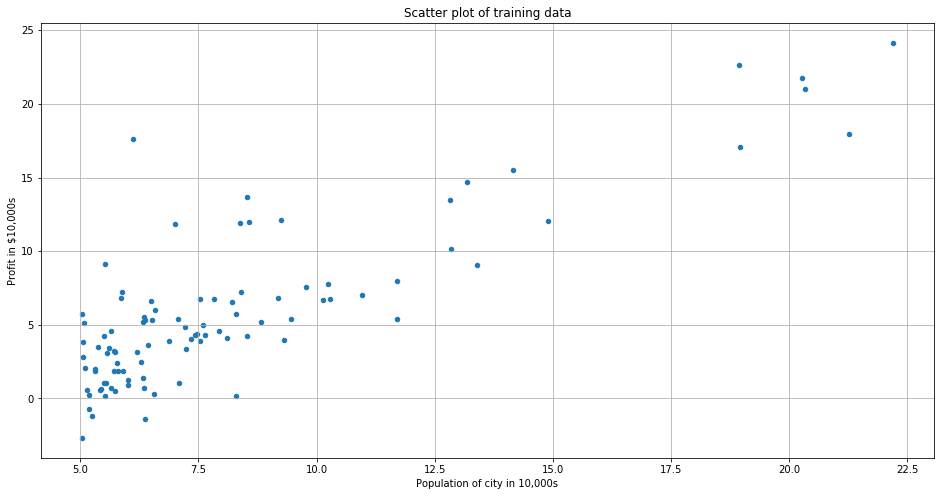

In [68]:
ax = data.plot(kind='scatter', x='Population', y='Profit', title='Scatter plot of training data', figsize=(16,8),grid=True);
ax.set_xlabel('Population of city in 10,000s');
ax.set_ylabel('Profit in $10,000s');

In [69]:
data.iplot(kind='scatter',x='Population',y='Profit',mode='markers',xTitle='Population of city in 10,000s',yTitle='Profit in $10,000s',title='Scatter plot of training data',color='blue',size=6,theme='white')

## Gradient Descent

First, you create a function to compute the cost of a given solution (characterized by the parameters beta):

In [70]:
def compute_cost(X, y, beta):

    e = np.asarray(np.dot(X,beta.transpose()) - y)**2
    
    return (1/(2*len(X)))*e.sum()

We store each example as a row in the X matrix. To take into account the intercept term (\beta0), we add an additional first column to X and set it to all ones. This allows us to treat \beta0 as simply another 'feature'.

In [71]:
data.insert(0, 'beta zero', 1)

Now let's do some variable initialization

In [72]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

Now, you need to guarantee that X (training set) and y (target variable) are correct.

In [73]:
X.head()

beta zero  Population
0          1      6.1101
1          1      5.5277
2          1      8.5186
3          1      7.0032
4          1      5.8598

In [74]:
y.head()

Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233

The cost function is expecting numpy matrices so we need to convert X and y before we can use them. We also need to initialize beta.

In [75]:
X = np.matrix(X.values)
y = np.matrix(y.values)
beta = np.matrix(np.array([0,0]))

Here's what beta looks like.

In [76]:
beta

matrix([[0, 0]])

Let's take a quick look at the shape of our matrices.

In [77]:
X.shape, beta.shape, y.shape

((97, 2), (1, 2), (97, 1))

Now let's compute the cost for our initial solution (0 values for beta).

In [78]:
compute_cost(X, y, beta)

32.072733877455676

Now, you are asked to define a function to perform gradient descent on the parameters beta

In [79]:
def gradient_descent2(X, y, theta, alpha, iters):
    '''
    alpha: learning rate
    iters: number of iterations
    OUTPUT:
    theta: learned parameters
    cost:  a vector with the cost at each training iteration
    '''
    temp       = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost       = np.zeros(iters)
    
    theta = theta.astype(float)
    e = compute_cost(X, y, theta)
    m = len(X)
    
    for j in range(1,iters+1):
        for i in range((m-1)):
            temp[0,0] += -(2/m) * (y[i] - (theta.item(0) + (theta.item(1)*X[i,1])))
            temp[0,1] += -(2/m) * X[i,1] * (y[i] - (theta.item(0) + (theta.item(1)*X[i,1])))
        
        temp[0,0] = theta[0,0]-(alpha)*temp[0,0]
        temp[0,1] = theta[0,1]-(alpha)*temp[0,1]
        
        theta[0,0] = temp[0,0]
        theta[0,1] = temp[0,1]
        
        cost[j-1] = compute_cost(X, y, theta)
        
        total_e = e-cost[j-1]

        '''
        if(total_e<=(alpha/j)):
            print('Iteration: ',j)
            return theta, cost
        ''' 
    return theta, cost


In [80]:
def gradient_descent(X, y, theta, alpha, iters):
    '''
    alpha: learning rate
    iters: number of iterations
    OUTPUT:
    theta: learned parameters
    cost:  a vector with the cost at each training iteration
    '''
    temp       = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost       = np.zeros(iters)
    
    theta = theta.astype(float)
    e = compute_cost(X, y, theta)
    m = len(X)
    
    for j in range(iters):
        predicted_values = np.dot(X, theta.transpose())
        theta = theta - alpha / m * np.dot((predicted_values - y).transpose(), X)
        
        cost[j] = compute_cost(X, y, theta)
        total_e = e-cost[j-1]

        
        if(total_e<=(alpha)):
            print('Iteration: ',j)
            return theta, cost
         
    return theta, cost


Initialize some additional variables - the learning rate alpha, and the number of iterations to perform

In [81]:
np.dot(X, beta.transpose()).shape, y.shape

((97, 1), (97, 1))

In [82]:
np.dot((np.dot(X, beta.transpose()) - y).transpose(), X)

matrix([[ -566.3961    , -6336.89842532]])

In [83]:
alpha = 0.01
iters = 1500

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [84]:
g, cost = gradient_descent(X, y, beta, alpha, iters)
g

matrix([[-3.63029144,  1.16636235]])

In [85]:
g2, cost2 = gradient_descent2(X, y, beta, alpha, iters)
g2

matrix([[-0.95154241,  0.89468185]])

Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [86]:
compute_cost(X, y, g)

4.483388256587725

Now let's plot the linear model along with the data to visually see how well it fits.

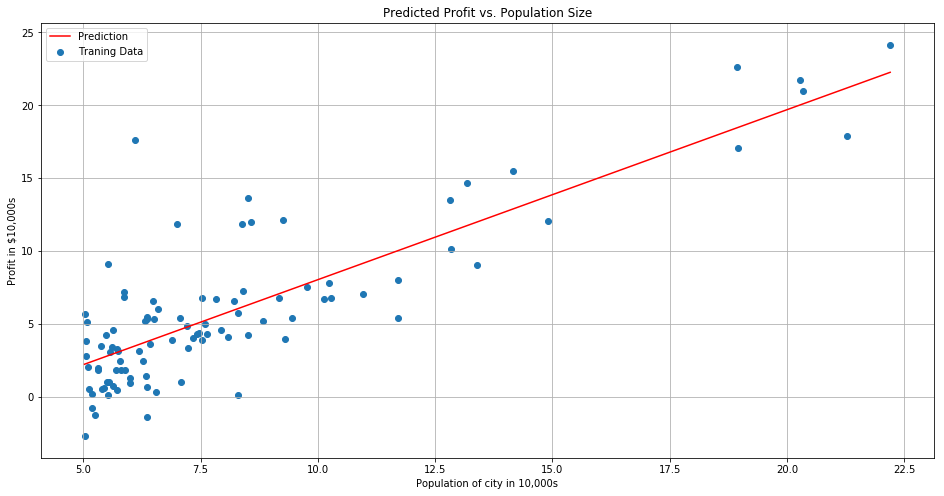

In [87]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Predicted Profit vs. Population Size')
ax.grid(True)

Looks pretty good! Remember that the gradient decent function also outputs a vector with the cost at each training iteration, we can plot it as well. 

Since the cost always decreases - this is an example of a convex optimization problem.

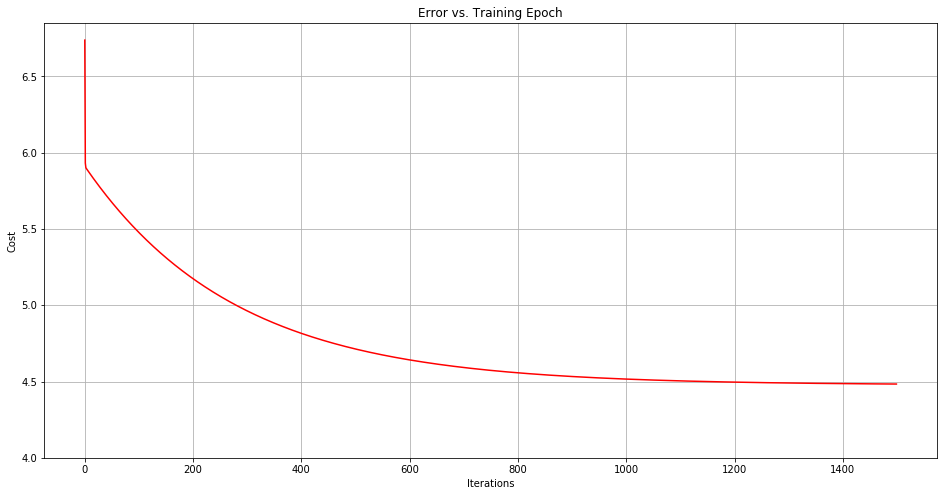

In [88]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_ylim(4.0)
ax.set_title('Error vs. Training Epoch')
ax.grid(True)

Now, we will show a contour plot that presents beta0 against beta1 and the outcome of J. First, we set values for beta0 and beta1

In [89]:
beta0_vals = np.linspace(-10, 10, 100)
beta1_vals = np.linspace(-1, 4, 100)

Now, initialize J values to a matrix of 0's

In [90]:
j_vals = np.zeros([len(beta0_vals), len(beta1_vals)])

In [91]:
for i in range(len(beta0_vals)):
    for j in range(len(beta1_vals)):
        t = np.matrix(np.array([beta0_vals[i], beta1_vals[j]]))
        j_vals[i,j] = compute_cost(X, y, t)

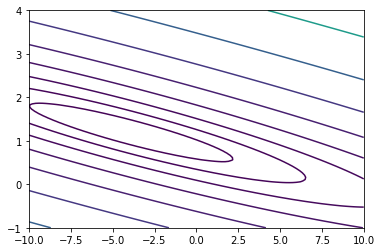

In [47]:
plt.contour(beta0_vals, beta1_vals, j_vals.T, np.logspace(-2, 3, 20));

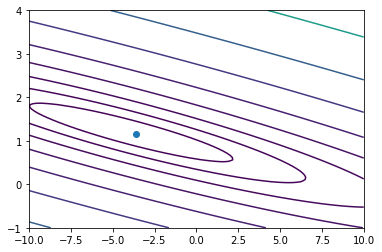

In [48]:
plt.scatter(g[0,0],g[0,1],)
plt.contour(beta0_vals, beta1_vals, j_vals.T, np.logspace(-2, 3, 20));

Now, in 3D

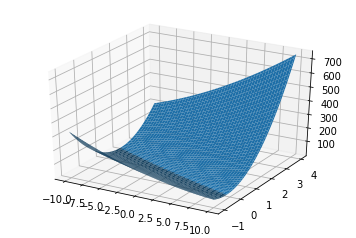

In [49]:
beta0_mesh, beta1_mesh = np.meshgrid(beta0_vals, beta1_vals)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(beta0_mesh, beta1_mesh, j_vals.T);

## Linear regression with multiple variables

From now on, you will use the second dataset, i.e., ex1data2.txt. This is a housing price dataset with 2 variables (size of the house in square feet and number of bedrooms) and a target (price of the house). You are asked to use the techniques already applied to analyze that data set.

In [49]:
data2 = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900

For this task we add another pre-processing step - normalizing the features.

Notice that the scale of the values for each feature is vastly large. A house will typically have 2-5 bedrooms, but may have anywhere from hundreds to thousands of square feet. If we use the features as they are in the dataset, the 'size' feature would too much wheighted and would end up dwarfing any contributions from the 'number of bedrooms' feature. To fix this, we need to do something called 'feature normalization'. That is, we need to adjust the scale of the features to level the playing field. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation.

In [50]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

Size  Bedrooms     Price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389

Given that you were asked to implement both cost function and gradient descent using matrix operations, your previously implementations will work just fine in the multivariate dataset. Hence, you need now insert the 'ones' column as before and separate the X's and the y's.

Conduct the rest of this exercise by repeating the experiments conducted in the simple linear dataset...

In [51]:
data2.insert(0, 'beta zero', 1)
data2.head()

beta zero      Size  Bedrooms     Price
0          1  0.130010 -0.223675  0.475747
1          1 -0.504190 -0.223675 -0.084074
2          1  0.502476 -0.223675  0.228626
3          1 -0.735723 -1.537767 -0.867025
4          1  1.257476  1.090417  1.595389

In [70]:
# set X (training data) and y (target variable)
cols2 = data2.shape[1]
X2 = data2.iloc[:,0:cols2-1]
y2 = data2.iloc[:,cols2-1:cols2+1]

4


In [71]:
X2.head()

beta zero      Size  Bedrooms
0          1  0.130010 -0.223675
1          1 -0.504190 -0.223675
2          1  0.502476 -0.223675
3          1 -0.735723 -1.537767
4          1  1.257476  1.090417

In [72]:
y2.head()

Price
0  0.475747
1 -0.084074
2  0.228626
3 -0.867025
4  1.595389

In [73]:
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
beta2 = np.matrix(np.array([0,0,0]))

X2.shape, y2.shape, beta2.shape

((47, 3), (47, 1), (1, 3))

In [74]:
compute_cost(X2, y2, beta2), beta2

(0.48936170212765961, matrix([[0, 0, 0]]))

In [85]:
def gradient_descent56(X, y, theta, alpha, iters):

    cost = np.zeros(iters)
    e = compute_cost(X, y, theta)
    m = len(X)
    
    for j in range(iters):
        predicted_values = np.dot(X, theta.transpose())
        theta = theta - ( (alpha /m) * np.dot((predicted_values - y).transpose(), X) )
        
        cost[j] = compute_cost(X, y, theta)
        '''
        if e-cost[j-1] <= alpha:
            print('Iteration: ',j)
            return theta, cost
'''
    return theta, cost


In [86]:
alpha2 = 0.01
iters2 = 1500

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [87]:
g2, cost2 = gradient_descent56(X2, y2, beta2, alpha2, iters2)
g2

matrix([[ -1.11081357e-16,   8.84042349e-01,  -5.24551809e-02]])

In [88]:
compute_cost(X2, y2, g2)

0.13068670606095903

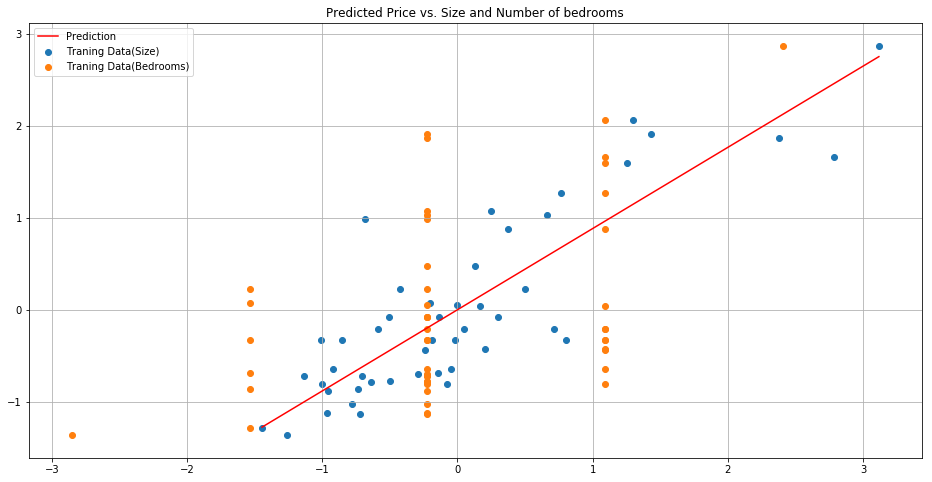

In [89]:
x = np.linspace(data2.Size.min(), data2.Size.max(), 100)
f = g2[0, 0] + (g2[0, 1] * x)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data2.Size, data2.Price, label='Traning Data(Size)')
ax.scatter(data2.Bedrooms, data2.Price, label='Traning Data(Bedrooms)')
ax.legend(loc='best')
ax.set_title('Predicted Price vs. Size and Number of bedrooms')

ax.grid(True)

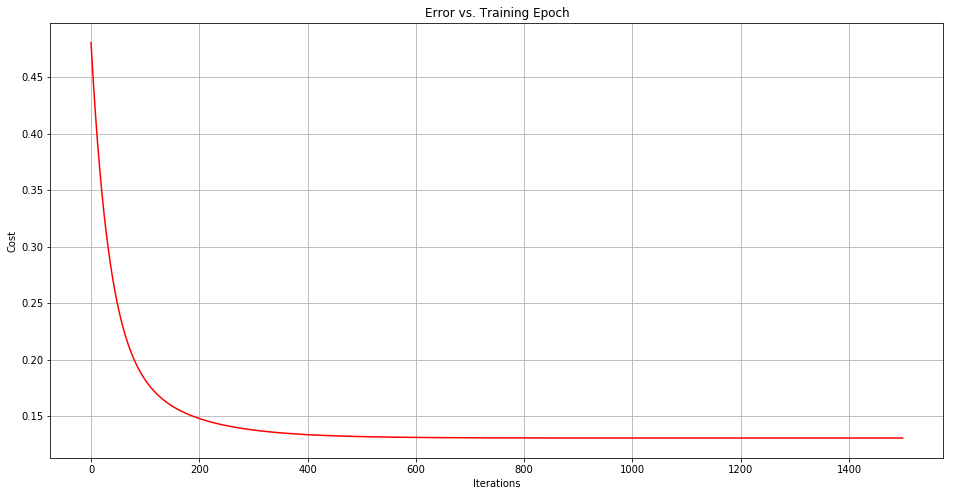

In [165]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(np.arange(iters2), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
ax.grid(True)

## Linear regression with multiple variables Part 4

In [2]:
import pandas as pd

data3 = pd.read_csv('groupon-deals.csv', header='infer')
data3.head()

url     city  value  \
0  http://www.groupon.com/atlanta/deals/buckhead-...  Atlanta     30   
1  http://www.groupon.com/atlanta/deals/european-...  Atlanta     70   
2  http://www.groupon.com/atlanta/deals/orchard-h...  Atlanta     99   
3    http://www.groupon.com/atlanta/deals/spa-bolena  Atlanta     65   
4  http://www.groupon.com/atlanta/deals/the-stova...  Atlanta    134   

   you_save  discount_pct  num_sold  limited_quantity  sold_out tipped_at  \
0        15            50       108                 0         0  10:26:00   
1        35            50       255                 0         0   7:26:00   
2        54            55       352                 0         0   8:41:00   
3        35            54       501                 0         0   7:15:00   
4        67            50       359                 1         0   1:50:00   

   tips_with started_at weekday_start  duration  featured          category  \
0         25   1/3/2011           Mon         1         1         Nightlife   
1         10   1/3/2011           Mon         1         0     Beauty & Spas   
2         20   1/3/2011           Mon         2         0  Health & Fitness   
3         20   1/3/2011           Mon         1         0     Beauty & Spas   
4          5   1/3/2011           Mon         2         0            Travel   

   likes  
0   14.0  
1   20.0  
2   28.0  
3   27.0  
4   36.0

In [3]:
data3 = data3.dropna(axis=0)

In [27]:
data3.isnull().sum()

beta zero           0
value               0
you_save            0
discount_pct        0
duration            0
likes               0
limited_quantity    0
sold_out            0
featured            0
tips_with           0
num_sold            0
dtype: int64

In [5]:
data3.drop(['url','city','tipped_at','started_at','weekday_start','category'],axis=1,inplace=True)

In [6]:
data3.head()

value  you_save  discount_pct  num_sold  limited_quantity  sold_out  \
0     30        15            50       108                 0         0   
1     70        35            50       255                 0         0   
2     99        54            55       352                 0         0   
3     65        35            54       501                 0         0   
4    134        67            50       359                 1         0   

   tips_with  duration  featured  likes  
0         25         1         1   14.0  
1         10         1         0   20.0  
2         20         2         0   28.0  
3         20         1         0   27.0  
4          5         2         0   36.0

In [7]:
 data3 = data3[['value','you_save','discount_pct','duration','likes','limited_quantity','sold_out','featured','tips_with','num_sold']]

In [128]:
data3 = (data3 - data3.mean()) / data3.std()
data3.head()

value  you_save  discount_pct  duration     likes  limited_quantity  \
0 -0.347031 -0.355389     -0.614038 -0.948418 -0.367319         -0.653700   
1 -0.206667 -0.247420     -0.614038 -0.948418 -0.315617         -0.653700   
2 -0.104903 -0.144850     -0.115386 -0.148496 -0.246681         -0.653700   
3 -0.224213 -0.247420     -0.215116 -0.948418 -0.255298         -0.653700   
4  0.017915 -0.074670     -0.614038 -0.148496 -0.177746          1.529656   

   sold_out  featured  tips_with  num_sold  
0 -0.204786  1.882015  -0.243457 -0.363229  
1 -0.204786 -0.531312  -0.561525 -0.271716  
2 -0.204786 -0.531312  -0.349479 -0.211330  
3 -0.204786 -0.531312  -0.349479 -0.118572  
4 -0.204786 -0.531312  -0.667548 -0.206973

In [129]:
data3.insert(0, 'beta zero', 1)

In [130]:
data3.head()

beta zero     value  you_save  discount_pct  duration     likes  \
0          1 -0.347031 -0.355389     -0.614038 -0.948418 -0.367319   
1          1 -0.206667 -0.247420     -0.614038 -0.948418 -0.315617   
2          1 -0.104903 -0.144850     -0.115386 -0.148496 -0.246681   
3          1 -0.224213 -0.247420     -0.215116 -0.948418 -0.255298   
4          1  0.017915 -0.074670     -0.614038 -0.148496 -0.177746   

   limited_quantity  sold_out  featured  tips_with  num_sold  
0         -0.653700 -0.204786  1.882015  -0.243457 -0.363229  
1         -0.653700 -0.204786 -0.531312  -0.561525 -0.271716  
2         -0.653700 -0.204786 -0.531312  -0.349479 -0.211330  
3         -0.653700 -0.204786 -0.531312  -0.349479 -0.118572  
4          1.529656 -0.204786 -0.531312  -0.667548 -0.206973

In [131]:
cols3 = data3.shape[1]
X3 = data3.iloc[:,0:cols3-1]
y3 = data3.iloc[:,cols3-1:cols3+1]

In [132]:
X3 = np.matrix(X3.values)
y3 = np.matrix(y3.values)

In [133]:
beta3 = np.matrix(np.zeros(cols3-1,dtype=np.int))

X3.shape, y3.shape, beta3.shape

((15875, 10), (15875, 1), (1, 10))

In [134]:
beta3

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [135]:
import math

def gradient_descent57(X, y, theta, alpha, iters):

    cost = np.zeros(iters)
    e = compute_cost(X, y, theta)
    m = len(X)
    
    for j in range(iters):
        predicted_values = np.dot(X, theta.transpose())
        print (predicted_values)
        theta = theta - ( (alpha /(m*math.sqrt(j+1)) ) * np.dot((predicted_values - y).transpose(), X) )
        
        print (theta)
        cost[j] = compute_cost(X, y, theta)
        
        '''
        if e-cost[j-1] <= alpha:
            print('Iteration: ',j)
            return theta, cost
'''
    return theta, cost


In [173]:
alpha3 = 0.1
iters3 = 2000

In [174]:
g3, cost3 = gradient_descent57(X3, y3, beta3, alpha3, iters3)
g3

[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
[[ -7.16137560e-19  -8.55295906e-03  -7.75097135e-03  -4.34231805e-03
   -3.82439229e-03   6.50663488e-02   1.21662475e-03   6.36841411e-03
    2.44022166e-02   3.44100465e-02]]
[[ 0.02356465]
 [-0.04494398]
 [-0.040052  ]
 ..., 
 [-0.05541758]
 [-0.068615  ]
 [-0.04200499]]
[[ -1.47571615e-18  -1.29189004e-02  -1.15294120e-02  -6.35906903e-03
   -5.63022767e-03   1.05361195e-01   1.76862256e-03   9.84058321e-03
    3.83209877e-02   5.45949153e-02]]
[[ 0.03478188]
 [-0.07267492]
 [-0.06400712]
 ..., 
 [-0.08903467]
 [-0.10820319]
 [-0.06761457]]
[[ -5.45426168e-19  -1.57679230e-02  -1.38929447e-02  -7.56133158e-03
   -6.71622469e-03   1.35413386e-01   2.07899496e-03   1.21933709e-02
    4.80830392e-02   6.90762126e-02]]
[[ 0.04150209]
 [-0.09322112]
 [-0.08141153]
 ..., 
 [-0.11369392]
 [-0.13632174]
 [-0.08644977]]
[[ -8.13977754e-19  -1.78249645e-02  -1.55275360e-02  -8.34998840e-03
   -7.43204829e-03   1.59617390e-01   2.26415097e-03

[[ -4.22808511e-18  -2.87162929e-02  -1.95306332e-02  -7.88625405e-03
   -6.41387893e-03   4.07617233e-01   2.15968424e-04   2.20749602e-02
    1.03722865e-01   1.70981068e-01]]
[[ 0.02702618]
 [-0.26273961]
 [-0.21237307]
 ..., 
 [-0.30997952]
 [-0.32810226]
 [-0.23706463]]
[[ -4.42380843e-18  -2.87589027e-02  -1.94541092e-02  -7.80374338e-03
   -6.31574161e-03   4.10297808e-01   1.47572612e-04   2.20377608e-02
    1.03849494e-01   1.71616775e-01]]
[[ 0.02602128]
 [-0.26411143]
 [-0.21330215]
 ..., 
 [-0.31152132]
 [-0.32929036]
 [-0.23824122]]
[[ -4.06467555e-18  -2.87996438e-02  -1.93774116e-02  -7.72226521e-03
   -6.21854875e-03   4.12902125e-01   8.00515869e-05   2.19982403e-02
    1.03960996e-01   1.72224454e-01]]
[[ 0.02502348]
 [-0.2654344 ]
 [-0.21419463]
 ..., 
 [-0.31300779]
 [-0.33042774]
 [-0.23937506]]
[[ -4.01007058e-18  -2.88386740e-02  -1.93006366e-02  -7.64183783e-03
   -6.12232754e-03   4.15433673e-01   1.34043897e-05   2.19565967e-02
    1.04058337e-01   1.72805621e

    1.02042394e-01   1.84205484e-01]]
[[-0.01040408]
 [-0.2962891 ]
 [-0.23365415]
 ..., 
 [-0.34769102]
 [-0.35391111]
 [-0.2655755 ]]
[[ -2.99097647e-18  -2.99005696e-02  -1.64017219e-02  -5.11150135e-03
   -2.91470149e-03   4.83354828e-01  -2.13956686e-03   1.95090366e-02
    1.01931999e-01   1.84310047e-01]]
[[-0.01106732]
 [-0.29666333]
 [-0.2338663 ]
 ..., 
 [-0.34811529]
 [-0.3541459 ]
 [-0.26589067]]
[[ -2.77023971e-18  -2.99208466e-02  -1.63460230e-02  -5.07039271e-03
   -2.85887710e-03   4.84356250e-01  -2.17619144e-03   1.94514038e-02
    1.01820684e-01   1.84410524e-01]]
[[-0.01172432]
 [-0.29702871]
 [-0.23407253]
 ..., 
 [-0.34852978]
 [-0.35437338]
 [-0.26619835]]
[[ -2.44579250e-18  -2.99410961e-02  -1.62908120e-02  -5.02990627e-03
   -2.80374386e-03   4.85341389e-01  -2.21233689e-03   1.93940203e-02
    1.01708516e-01   1.84507056e-01]]
[[-0.01237515]
 [-0.29738549]
 [-0.23427304]
 ..., 
 [-0.34893477]
 [-0.35459379]
 [-0.26649877]]
[[ -2.55965814e-18  -2.99613215e-02 

[[-0.02936377]
 [-0.30506496]
 [-0.23831871]
 ..., 
 [-0.35775122]
 [-0.35882296]
 [-0.27296803]]
[[ -2.89909843e-18  -3.05658135e-02  -1.47895447e-02  -4.03258355e-03
   -1.38782737e-03   5.09546410e-01  -3.13090314e-03   1.77585983e-02
    9.80610587e-02   1.86101957e-01]]
[[-0.0298556 ]
 [-0.30524487]
 [-0.23840529]
 ..., 
 [-0.35796137]
 [-0.35890682]
 [-0.27312003]]
[[ -2.76835020e-18  -3.05860144e-02  -1.47469443e-02  -4.00732558e-03
   -1.35020948e-03   5.10166376e-01  -3.15501429e-03   1.77107184e-02
    9.79434475e-02   1.86121636e-01]]
[[-0.03034321]
 [-0.30542109]
 [-0.2384896 ]
 ..., 
 [-0.35816746]
 [-0.35898806]
 [-0.27326897]]
[[ -2.71138471e-18  -3.06062200e-02  -1.47046543e-02  -3.98242543e-03
   -1.31301902e-03   5.10778402e-01  -3.17883387e-03   1.76631427e-02
    9.78260683e-02   1.86139941e-01]]
[[-0.03082665]
 [-0.30559371]
 [-0.23857169]
 ..., 
 [-0.35836958]
 [-0.35906676]
 [-0.27341491]]
[[ -2.78432527e-18  -3.06264302e-02  -1.46626702e-02  -3.95787740e-03
   -

    9.05665409e-02   1.85560439e-01]]
[[-0.05659395]
 [-0.31208074]
 [-0.24105302]
 ..., 
 [-0.36635182]
 [-0.36097226]
 [-0.27900927]]
[[ -1.85964426e-18  -3.20313757e-02  -1.22864888e-02  -2.86451441e-03
    5.21030257e-04   5.40377852e-01  -4.32309338e-03   1.49693248e-02
    9.04783011e-02   1.85539044e-01]]
[[-0.05687244]
 [-0.31212441]
 [-0.24106181]
 ..., 
 [-0.36641156]
 [-0.36097173]
 [-0.279049  ]]
[[ -1.73077249e-18  -3.20510176e-02  -1.22584590e-02  -2.85521134e-03
    5.38533838e-04   5.40661041e-01  -4.33360123e-03   1.49395599e-02
    9.03904911e-02   1.85517506e-01]]
[[-0.05714897]
 [-0.31216727]
 [-0.24107019]
 ..., 
 [-0.36647038]
 [-0.36097081]
 [-0.27908805]]
[[ -1.64722201e-18  -3.20706410e-02  -1.22305516e-02  -2.84603270e-03
    5.55869105e-04   5.40941677e-01  -4.34399677e-03   1.49099831e-02
    9.03031096e-02   1.85495828e-01]]
[[-0.05742356]
 [-0.31220932]
 [-0.24107818]
 ..., 
 [-0.3665283 ]
 [-0.36096951]
 [-0.27912644]]
[[ -1.59593833e-18  -3.20902457e-02 

[[-0.06700406]
 [-0.31336803]
 [-0.24115562]
 ..., 
 [-0.36825352]
 [-0.3607011 ]
 [-0.28023583]]
[[ -1.63751882e-18  -3.28574914e-02  -1.11770661e-02  -2.55961722e-03
    1.14258470e-03   5.50593527e-01  -4.68788367e-03   1.38427150e-02
    8.70690566e-02   1.84538475e-01]]
[[-0.06721262]
 [-0.31338673]
 [-0.24115311]
 ..., 
 [-0.36828492]
 [-0.36069069]
 [-0.2802552 ]]
[[ -1.52097735e-18  -3.28762189e-02  -1.11532808e-02  -2.55446702e-03
    1.15430996e-03   5.50790770e-01  -4.69456580e-03   1.38198611e-02
    8.69981470e-02   1.84514403e-01]]
[[-0.06741985]
 [-0.31340504]
 [-0.24115045]
 ..., 
 [-0.36831587]
 [-0.36068016]
 [-0.28027424]]
[[ -1.50353305e-18  -3.28949233e-02  -1.11295740e-02  -2.54938976e-03
    1.16593024e-03   5.50986477e-01  -4.70117916e-03   1.37971425e-02
    8.69275909e-02   1.84490330e-01]]
[[-0.06762576]
 [-0.31342297]
 [-0.24114763]
 ..., 
 [-0.36834638]
 [-0.36066952]
 [-0.28029297]]
[[ -1.41069245e-18  -3.29136045e-02  -1.11059451e-02  -2.54438458e-03
    

[[ -6.09058108e-19  -3.40944180e-02  -9.68877173e-03  -2.33883158e-03
    1.75263826e-03   5.61308041e-01  -5.01995873e-03   1.25367502e-02
    8.29140818e-02   1.82939358e-01]]
[[-0.07890798]
 [-0.31400512]
 [-0.2407471 ]
 ..., 
 [-0.36965671]
 [-0.35983169]
 [-0.28103957]]
[[ -6.96195683e-19  -3.41115230e-02  -9.66909056e-03  -2.33718736e-03
    1.75910795e-03   5.61428841e-01  -5.02325403e-03   1.25212479e-02
    8.28635609e-02   1.82917724e-01]]
[[-0.07904504]
 [-0.3140074 ]
 [-0.24073937]
 ..., 
 [-0.36966843]
 [-0.35981866]
 [-0.2810454 ]]
[[ -6.09200606e-19  -3.41286050e-02  -9.64945404e-03  -2.33557698e-03
    1.76552419e-03   5.61548862e-01  -5.02651569e-03   1.25058279e-02
    8.28132817e-02   1.82896144e-01]]
[[-0.07918133]
 [-0.31400957]
 [-0.24073163]
 ..., 
 [-0.36967999]
 [-0.35980564]
 [-0.28105113]]
[[ -5.73437493e-19  -3.41456641e-02  -9.62986185e-03  -2.33400007e-03
    1.77188746e-03   5.61668108e-01  -5.02974405e-03   1.24904895e-02
    8.27632426e-02   1.82874620e

[[-0.08512674]
 [-0.31399333]
 [-0.24033135]
 ..., 
 [-0.37009226]
 [-0.3591798 ]
 [-0.28123021]]
[[ -2.26158328e-19  -3.49702274e-02  -8.70070544e-03  -2.29108959e-03
    2.03196276e-03   5.66775556e-01  -5.15504561e-03   1.18165257e-02
    8.05397937e-02   1.81870754e-01]]
[[-0.08523023]
 [-0.31399112]
 [-0.24032332]
 ..., 
 [-0.37009788]
 [-0.35916796]
 [-0.28123213]]
[[ -1.22073451e-19  -3.49861695e-02  -8.68302568e-03  -2.29083376e-03
    2.03616730e-03   5.66862890e-01  -5.15693974e-03   1.18047044e-02
    8.05003809e-02   1.81852140e-01]]
[[-0.08533319]
 [-0.31398886]
 [-0.24031531]
 ..., 
 [-0.37010341]
 [-0.35915615]
 [-0.281234  ]]
[[ -1.92941504e-19  -3.50020909e-02  -8.66537772e-03  -2.29059764e-03
    2.04033839e-03   5.66949721e-01  -5.15881363e-03   1.17929410e-02
    8.04611479e-02   1.81833583e-01]]
[[-0.08543562]
 [-0.31398654]
 [-0.24030729]
 ..., 
 [-0.37010886]
 [-0.35914438]
 [-0.28123582]]
[[ -4.19664501e-20  -3.50179916e-02  -8.64776140e-03  -2.29038102e-03
    

[[  1.81100688e-19  -3.56827971e-02  -7.91785399e-03  -2.29706627e-03
    2.19463447e-03   5.70325348e-01  -5.22380234e-03   1.13275708e-02
    7.88987678e-02   1.81072112e-01]]
[[-0.0894646 ]
 [-0.3138431 ]
 [-0.23996502]
 ..., 
 [-0.37028266]
 [-0.35865884]
 [-0.28127651]]
[[  2.16729863e-19  -3.56978331e-02  -7.90147238e-03  -2.29754322e-03
    2.19755602e-03   5.70393038e-01  -5.22493453e-03   1.13180742e-02
    7.88666868e-02   1.81056018e-01]]
[[-0.08954632]
 [-0.31383912]
 [-0.23995754]
 ..., 
 [-0.37028538]
 [-0.35864857]
 [-0.28127672]]
[[  2.25626154e-19  -3.57128506e-02  -7.88511573e-03  -2.29803275e-03
    2.20045470e-03   5.70460370e-01  -5.22605345e-03   1.13086211e-02
    7.88347460e-02   1.81039976e-01]]
[[-0.08962764]
 [-0.31383512]
 [-0.23995007]
 ..., 
 [-0.37028804]
 [-0.35863833]
 [-0.2812769 ]]
[[  1.67871524e-19  -3.57278494e-02  -7.86878391e-03  -2.29853473e-03
    2.20333071e-03   5.70527347e-01  -5.22715923e-03   1.12992115e-02
    7.88029445e-02   1.81023986e

    7.79381372e-02   1.80582183e-01]]
[[-0.09189425]
 [-0.31370614]
 [-0.23973361]
 ..., 
 [-0.37034964]
 [-0.35834696]
 [-0.28127229]]
[[  8.43504801e-19  -3.61694166e-02  -7.38981986e-03  -2.31883304e-03
    2.27991212e-03   5.72382851e-01  -5.25476693e-03   1.10358894e-02
    7.79101924e-02   1.80567682e-01]]
[[-0.09196439]
 [-0.31370161]
 [-0.23972665]
 ..., 
 [-0.37035115]
 [-0.35833777]
 [-0.28127185]]
[[  7.40732285e-19  -3.61838630e-02  -7.37420336e-03  -2.31966733e-03
    2.28216774e-03   5.72439934e-01  -5.25551858e-03   1.10277062e-02
    7.78823660e-02   1.80553228e-01]]
[[-0.09203421]
 [-0.31369706]
 [-0.23971971]
 ..., 
 [-0.37035263]
 [-0.35832861]
 [-0.28127139]]
[[  8.69051196e-19  -3.61982922e-02  -7.35860831e-03  -2.32051079e-03
    2.28440576e-03   5.72496732e-01  -5.25626036e-03   1.10195590e-02
    7.78546575e-02   1.80538821e-01]]
[[-0.0921037 ]
 [-0.31369251]
 [-0.2397128 ]
 ..., 
 [-0.37035409]
 [-0.35831948]
 [-0.28127092]]
[[  9.92951452e-19  -3.62127045e-02 

[[-0.09558265]
 [-0.31342167]
 [-0.23934766]
 ..., 
 [-0.37039728]
 [-0.35785142]
 [-0.28122492]]
[[  9.83284446e-19  -3.70073573e-02  -6.48797597e-03  -2.38249332e-03
    2.38826099e-03   5.75359354e-01  -5.28503893e-03   1.06022941e-02
    7.64300756e-02   1.79779026e-01]]
[[-0.09563612]
 [-0.31341684]
 [-0.23934177]
 ..., 
 [-0.37039749]
 [-0.35784408]
 [-0.28122387]]
[[  9.83284446e-19  -3.70208507e-02  -6.47350524e-03  -2.38374797e-03
    2.38966729e-03   5.75402147e-01  -5.28532927e-03   1.05959540e-02
    7.64083595e-02   1.79767149e-01]]
[[-0.09568935]
 [-0.313412  ]
 [-0.23933589]
 ..., 
 [-0.37039769]
 [-0.35783676]
 [-0.28122281]]
[[  9.79273085e-19  -3.70343294e-02  -6.45905148e-03  -2.38500778e-03
    2.39106245e-03   5.75444743e-01  -5.28561381e-03   1.05896398e-02
    7.63867305e-02   1.79755309e-01]]
[[-0.09574235]
 [-0.31340717]
 [-0.23933003]
 ..., 
 [-0.37039787]
 [-0.35782948]
 [-0.28122175]]
[[  9.95302445e-19  -3.70477935e-02  -6.44461464e-03  -2.38627269e-03
    

[[  7.87630656e-19  -3.76647433e-02  -5.78413573e-03  -2.45065322e-03
    2.44639865e-03   5.77279793e-01  -5.29335331e-03   1.03145707e-02
    7.54432133e-02   1.79229876e-01]]
[[-0.09803606]
 [-0.31317748]
 [-0.23906865]
 ..., 
 [-0.37039246]
 [-0.35751129]
 [-0.28116573]]
[[  7.03426121e-19  -3.76775459e-02  -5.77044689e-03  -2.45211218e-03
    2.44733701e-03   5.77314056e-01  -5.29340819e-03   1.03093760e-02
    7.54253778e-02   1.79219770e-01]]
[[-0.09807907]
 [-0.31317278]
 [-0.23906361]
 ..., 
 [-0.37039211]
 [-0.35750528]
 [-0.28116449]]
[[  7.03426121e-19  -3.76903355e-02  -5.75677245e-03  -2.45357426e-03
    2.44826763e-03   5.77348172e-01  -5.29345935e-03   1.03042014e-02
    7.54076109e-02   1.79209697e-01]]
[[-0.0981219 ]
 [-0.31316808]
 [-0.23905858]
 ..., 
 [-0.37039175]
 [-0.3574993 ]
 [-0.28116324]]
[[  6.53759610e-19  -3.77031122e-02  -5.74311234e-03  -2.45503943e-03
    2.44919059e-03   5.77382142e-01  -5.29350682e-03   1.02990467e-02
    7.53899122e-02   1.79199656e

    7.49208197e-02   1.78931104e-01]]
[[-0.0992902 ]
 [-0.31303409]
 [-0.23891942]
 ..., 
 [-0.37037834]
 [-0.35733577]
 [-0.28112659]]
[[  7.54568216e-19  -3.80681502e-02  -5.35301637e-03  -2.49874086e-03
    2.47285446e-03   5.78307116e-01  -5.29341902e-03   1.01578262e-02
    7.49049691e-02   1.78921946e-01]]
[[-0.09932807]
 [-0.31302955]
 [-0.23891485]
 ..., 
 [-0.37037779]
 [-0.35733046]
 [-0.28112531]]
[[  7.21086347e-19  -3.80805532e-02  -5.33976703e-03  -2.50028523e-03
    2.47357114e-03   5.78337050e-01  -5.29337000e-03   1.01532275e-02
    7.48891780e-02   1.78912818e-01]]
[[-0.09936579]
 [-0.31302502]
 [-0.23891029]
 ..., 
 [-0.37037723]
 [-0.35732518]
 [-0.28112403]]
[[  7.50822341e-19  -3.80929443e-02  -5.32653077e-03  -2.50183181e-03
    2.47428168e-03   5.78366861e-01  -5.29331821e-03   1.01486460e-02
    7.48734459e-02   1.78903718e-01]]
[[-0.09940335]
 [-0.3130205 ]
 [-0.23890575]
 ..., 
 [-0.37037666]
 [-0.35731991]
 [-0.28112275]]
[[  8.51094915e-19  -3.81053233e-02 

[[  3.86672233e-19  -3.87096201e-02  -4.66801307e-03  -2.58313731e-03
    2.50330923e-03   5.79737423e-01  -5.28752485e-03   9.93597709e-03
    7.41436679e-02   1.78475417e-01]]
[[-0.10113383]
 [-0.31279815]
 [-0.23869228]
 ..., 
 [-0.37034247]
 [-0.3570779 ]
 [-0.2810574 ]]
[[  3.86672233e-19  -3.87214245e-02  -4.65541014e-03  -2.58477008e-03
    2.50375363e-03   5.79761615e-01  -5.28735895e-03   9.93218617e-03
    7.41306735e-02   1.78467677e-01]]
[[-0.10116442]
 [-0.31279397]
 [-0.23868843]
 ..., 
 [-0.37034171]
 [-0.35707364]
 [-0.28105613]]
[[  4.18694134e-19  -3.87332182e-02  -4.64281857e-03  -2.58640401e-03
    2.50419381e-03   5.79785712e-01  -5.28719136e-03   9.92840867e-03
    7.41177258e-02   1.78459961e-01]]
[[-0.1011949 ]
 [-0.31278979]
 [-0.2386846 ]
 ..., 
 [-0.37034096]
 [-0.3570694 ]
 [-0.28105486]]
[[  3.33369767e-19  -3.87450014e-02  -4.63023832e-03  -2.58803910e-03
    2.50462981e-03   5.79809715e-01  -5.28702211e-03   9.92464454e-03
    7.41048246e-02   1.78452268e

 [-0.28099862]]
[[  5.69353253e-19  -3.92646654e-02  -4.07541043e-03  -2.66257963e-03
    2.52035357e-03   5.80799884e-01  -5.27792248e-03   9.76816973e-03
    7.35693181e-02   1.78129219e-01]]
[[-0.10247803]
 [-0.31260513]
 [-0.23852111]
 ..., 
 [-0.37030408]
 [-0.35689195]
 [-0.28099739]]
[[  5.21293665e-19  -3.92759864e-02  -4.06332242e-03  -2.66425276e-03
    2.52062543e-03   5.80820034e-01  -5.27769223e-03   9.76496027e-03
    7.35583541e-02   1.78122525e-01]]
[[-0.10250353]
 [-0.31260128]
 [-0.23851782]
 ..., 
 [-0.37030324]
 [-0.35688846]
 [-0.28099617]]
[[  4.66408763e-19  -3.92872978e-02  -4.05124454e-03  -2.66592643e-03
    2.52089428e-03   5.80840109e-01  -5.27746096e-03   9.76176168e-03
    7.35474282e-02   1.78115852e-01]]
[[-0.10252893]
 [-0.31259744]
 [-0.23851454]
 ..., 
 [-0.37030241]
 [-0.35688498]
 [-0.28099495]]
[[  5.07542250e-19  -3.92985997e-02  -4.03917675e-03  -2.66760064e-03
    2.52116014e-03   5.80860109e-01  -5.27722867e-03   9.75857391e-03
    7.35365402e-

[[-0.10385348]
 [-0.31238643]
 [-0.23834147]
 ..., 
 [-0.37025272]
 [-0.35670607]
 [-0.2809263 ]]
[[ -1.09896039e-19  -3.99384894e-02  -3.35577668e-03  -2.76528552e-03
    2.53211497e-03   5.81903857e-01  -5.26236369e-03   9.59071145e-03
    7.29648107e-02   1.77755048e-01]]
[[-0.10387397]
 [-0.31238299]
 [-0.23833877]
 ..., 
 [-0.37025185]
 [-0.35670336]
 [-0.28092515]]
[[ -9.34535578e-20  -3.99492636e-02  -3.34426689e-03  -2.76697481e-03
    2.53223700e-03   5.81920022e-01  -5.26208861e-03   9.58808733e-03
    7.29559028e-02   1.77749452e-01]]
[[-0.10389438]
 [-0.31237956]
 [-0.23833607]
 ..., 
 [-0.37025098]
 [-0.35670065]
 [-0.28092401]]
[[ -1.00026117e-19  -3.99600295e-02  -3.33276597e-03  -2.76866413e-03
    2.53235707e-03   5.81936130e-01  -5.26181306e-03   9.58547162e-03
    7.29470246e-02   1.77743872e-01]]
[[-0.10391472]
 [-0.31237613]
 [-0.23833338]
 ..., 
 [-0.37025011]
 [-0.35669795]
 [-0.28092287]]
[[ -3.43447695e-20  -3.99707869e-02  -3.32127390e-03  -2.77035346e-03
    

[[ -9.83089482e-20  -4.03316672e-02  -2.93568382e-03  -2.82775758e-03
    2.53542928e-03   5.82466070e-01  -5.25191634e-03   9.49897021e-03
    7.26540728e-02   1.77558297e-01]]
[[-0.10458307]
 [-0.31226036]
 [-0.23824452]
 ..., 
 [-0.37021976]
 [-0.35661051]
 [-0.28088388]]
[[ -1.59286540e-19  -4.03421414e-02  -2.92449055e-03  -2.82944378e-03
    2.53548751e-03   5.82480294e-01  -5.25162769e-03   9.49663605e-03
    7.26461868e-02   1.77553262e-01]]
[[-0.10460098]
 [-0.31225717]
 [-0.23824213]
 ..., 
 [-0.3702189 ]
 [-0.3566082 ]
 [-0.2808828 ]]
[[ -1.75322972e-19  -4.03526077e-02  -2.91330552e-03  -2.83112980e-03
    2.53554423e-03   5.82494470e-01  -5.25133879e-03   9.49430915e-03
    7.26383263e-02   1.77548240e-01]]
[[-0.10461883]
 [-0.31225398]
 [-0.23823974]
 ..., 
 [-0.37021803]
 [-0.35660589]
 [-0.28088171]]
[[ -1.52886363e-19  -4.03630663e-02  -2.90212872e-03  -2.83281562e-03
    2.53559947e-03   5.82508598e-01  -5.25104963e-03   9.49198947e-03
    7.26304914e-02   1.77543232e

[[  1.58634204e-19  -4.06937113e-02  -2.54871967e-03  -2.88663467e-03
    2.53664285e-03   5.82936474e-01  -5.24169153e-03   9.42141520e-03
    7.23926677e-02   1.77390170e-01]]
[[-0.10517457]
 [-0.31215225]
 [-0.23816518]
 ..., 
 [-0.37018967]
 [-0.35653528]
 [-0.28084665]]
[[  1.99447770e-19  -4.07039207e-02  -2.53780561e-03  -2.88831175e-03
    2.53665463e-03   5.82949123e-01  -5.24139663e-03   9.41931908e-03
    7.23856214e-02   1.77385602e-01]]
[[-0.10519045]
 [-0.31214927]
 [-0.23816304]
 ..., 
 [-0.37018881]
 [-0.3565333 ]
 [-0.28084561]]
[[  2.59061715e-19  -4.07141228e-02  -2.52689926e-03  -2.88998850e-03
    2.53666527e-03   5.82961731e-01  -5.24110164e-03   9.41722930e-03
    7.23785976e-02   1.77381048e-01]]
[[-0.10520627]
 [-0.3121463 ]
 [-0.23816091]
 ..., 
 [-0.37018796]
 [-0.35653132]
 [-0.28084457]]
[[  2.37112161e-19  -4.07243177e-02  -2.51600060e-03  -2.89166492e-03
    2.53667475e-03   5.82974297e-01  -5.24080654e-03   9.41514584e-03
    7.23715960e-02   1.77376505e

[[-0.10562817]
 [-0.31206533]
 [-0.23810394]
 ..., 
 [-0.37016426]
 [-0.35647937]
 [-0.28081608]]
[[  6.67308467e-20  -4.10068642e-02  -2.21390741e-03  -2.93845437e-03
    2.53650697e-03   5.83309939e-01  -5.23251886e-03   9.35927927e-03
    7.21842682e-02   1.77254254e-01]]
[[-0.10564251]
 [-0.31206253]
 [-0.238102  ]
 ..., 
 [-0.37016342]
 [-0.35647763]
 [-0.28081509]]
[[  4.51616842e-20  -4.10168532e-02  -2.20322602e-03  -2.94011960e-03
    2.53648664e-03   5.83321371e-01  -5.23222247e-03   9.35736901e-03
    7.21778778e-02   1.77250058e-01]]
[[-0.10565681]
 [-0.31205972]
 [-0.23810006]
 ..., 
 [-0.37016258]
 [-0.3564759 ]
 [-0.28081409]]
[[  1.34466753e-19  -4.10268352e-02  -2.19255193e-03  -2.94178440e-03
    2.53646539e-03   5.83332766e-01  -5.23192608e-03   9.35546439e-03
    7.21715072e-02   1.77245873e-01]]
[[-0.10567106]
 [-0.31205692]
 [-0.23809814]
 ..., 
 [-0.37016174]
 [-0.35647418]
 [-0.2808131 ]]
[[  1.99097709e-19  -4.10368104e-02  -2.18188512e-03  -2.94344877e-03
    

 [-0.28077529]]
[[  5.46625510e-19  -4.14205916e-02  -1.77142553e-03  -3.00799398e-03
    2.53494169e-03   5.83759979e-01  -5.22010516e-03   9.28367752e-03
    7.19321968e-02   1.77087390e-01]]
[[-0.10620372]
 [-0.31194936]
 [-0.23802584]
 ..., 
 [-0.37012865]
 [-0.35641126]
 [-0.28077435]]
[[  4.38359506e-19  -4.14303008e-02  -1.76103984e-03  -3.00963900e-03
    2.53488853e-03   5.83769983e-01  -5.21981122e-03   9.28198732e-03
    7.19265824e-02   1.77083641e-01]]
[[-0.10621616]
 [-0.31194678]
 [-0.23802415]
 ..., 
 [-0.37012784]
 [-0.35640983]
 [-0.28077341]]
[[  5.01479064e-19  -4.14400035e-02  -1.75066094e-03  -3.01128349e-03
    2.53483471e-03   5.83779956e-01  -5.21951739e-03   9.28030197e-03
    7.19209851e-02   1.77079901e-01]]
[[-0.10622855]
 [-0.3119442 ]
 [-0.23802246]
 ..., 
 [-0.37012702]
 [-0.3564084 ]
 [-0.28077246]]
[[  5.64563072e-19  -4.14496998e-02  -1.74028880e-03  -3.01292745e-03
    2.53478025e-03   5.83789897e-01  -5.21922367e-03   9.27862144e-03
    7.19154047e-

[[-0.10677847]
 [-0.3118262 ]
 [-0.23794755]
 ..., 
 [-0.37008862]
 [-0.35634734]
 [-0.28072866]]
[[  1.04520102e-19  -4.19077997e-02  -1.25017932e-03  -3.09118191e-03
    2.53150029e-03   5.84232756e-01  -5.20529205e-03   9.20330776e-03
    7.16663938e-02   1.76908147e-01]]
[[-0.10678904]
 [-0.31182386]
 [-0.23794611]
 ..., 
 [-0.37008784]
 [-0.35634621]
 [-0.28072778]]
[[  1.95176480e-19  -4.19171951e-02  -1.24012592e-03  -3.09279795e-03
    2.53141996e-03   5.84241311e-01  -5.20500596e-03   9.20184388e-03
    7.16615760e-02   1.76904864e-01]]
[[-0.10679958]
 [-0.31182152]
 [-0.23794467]
 ..., 
 [-0.37008705]
 [-0.35634508]
 [-0.28072689]]
[[  1.95176480e-19  -4.19265846e-02  -1.23007876e-03  -3.09441338e-03
    2.53133920e-03   5.84249839e-01  -5.20472006e-03   9.20038404e-03
    7.16567725e-02   1.76901589e-01]]
[[-0.10681009]
 [-0.31181919]
 [-0.23794324]
 ..., 
 [-0.37008627]
 [-0.35634397]
 [-0.28072601]]
[[  2.59444712e-19  -4.19359682e-02  -1.22003784e-03  -3.09602821e-03
    

 [-0.28066844]]
[[  1.04930610e-18  -4.25607585e-02  -5.51374912e-04  -3.20436666e-03
    2.52495364e-03   5.84781169e-01  -5.18552298e-03   9.10868575e-03
    7.13570178e-02   1.76694531e-01]]
[[-0.10746031]
 [-0.31166841]
 [-0.2378546 ]
 ..., 
 [-0.3700337 ]
 [-0.35627888]
 [-0.28066762]]
[[  1.12825284e-18  -4.25697581e-02  -5.41742059e-04  -3.20593765e-03
    2.52485187e-03   5.84788109e-01  -5.18525319e-03   9.10747766e-03
    7.13530969e-02   1.76691785e-01]]
[[-0.10746874]
 [-0.31166637]
 [-0.23785345]
 ..., 
 [-0.37003296]
 [-0.35627809]
 [-0.28066681]]
[[  1.06343587e-18  -4.25787524e-02  -5.32114816e-04  -3.20750798e-03
    2.52474991e-03   5.84795030e-01  -5.18498366e-03   9.10627276e-03
    7.13491872e-02   1.76689045e-01]]
[[-0.10747714]
 [-0.31166433]
 [-0.23785231]
 ..., 
 [-0.37003222]
 [-0.35627731]
 [-0.280666  ]]
[[  1.04090200e-18  -4.25877415e-02  -5.22493174e-04  -3.20907765e-03
    2.52464776e-03   5.84801930e-01  -5.18471439e-03   9.10507104e-03
    7.13452885e-

[[-0.10773274]
 [-0.31160102]
 [-0.23781756]
 ..., 
 [-0.37000885]
 [-0.35625453]
 [-0.28064052]]
[[  9.03573678e-19  -4.28726619e-02  -2.17510254e-04  -3.25895716e-03
    2.52128940e-03   5.85012651e-01  -5.17623766e-03   9.06823355e-03
    7.12261796e-02   1.76602297e-01]]
[[-0.10774033]
 [-0.3115991 ]
 [-0.23781653]
 ..., 
 [-0.37000813]
 [-0.35625388]
 [-0.28063974]]
[[  8.53681000e-19  -4.28814818e-02  -2.08068996e-04  -3.26050489e-03
    2.52118207e-03   5.85018933e-01  -5.17597723e-03   9.06713111e-03
    7.12226274e-02   1.76599776e-01]]
[[-0.10774789]
 [-0.31159719]
 [-0.23781551]
 ..., 
 [-0.37000741]
 [-0.35625324]
 [-0.28063896]]
[[  8.31517099e-19  -4.28902966e-02  -1.98633073e-04  -3.26205196e-03
    2.52107461e-03   5.85025198e-01  -5.17571706e-03   9.06603152e-03
    7.12190851e-02   1.76597260e-01]]
[[-0.10775544]
 [-0.31159527]
 [-0.23781448]
 ..., 
 [-0.37000669]
 [-0.3562526 ]
 [-0.28063818]]
[[  8.50901231e-19  -4.28991065e-02  -1.89202476e-04  -3.26359835e-03
    

[[-0.10818102]
 [-0.3114833 ]
 [-0.23775698]
 ..., 
 [-0.3699632 ]
 [-0.35621959]
 [-0.28059136]]
[[  4.45409131e-19  -4.34358616e-02   3.85392552e-04  -3.35816048e-03
    2.51413807e-03   5.85386728e-01  -5.15989348e-03   9.00212254e-03
    7.10145653e-02   1.76450281e-01]]
[[-0.10818725]
 [-0.31148159]
 [-0.23775614]
 ..., 
 [-0.36996252]
 [-0.35621916]
 [-0.28059063]]
[[  4.23894864e-19  -4.34443710e-02   3.94501971e-04  -3.35966444e-03
    2.51402642e-03   5.85391978e-01  -5.15965145e-03   9.00118770e-03
    7.10115948e-02   1.76448119e-01]]
[[-0.10819347]
 [-0.31147989]
 [-0.2377553 ]
 ..., 
 [-0.36996183]
 [-0.35621873]
 [-0.2805899 ]]
[[  3.75509590e-19  -4.34528758e-02   4.03606509e-04  -3.36116772e-03
    2.51391474e-03   5.85397213e-01  -5.15940971e-03   9.00025518e-03
    7.10086324e-02   1.76445962e-01]]
[[-0.10819966]
 [-0.31147819]
 [-0.23775447]
 ..., 
 [-0.36996115]
 [-0.3562183 ]
 [-0.28058917]]
[[  4.05065046e-19  -4.34613760e-02   4.12706175e-04  -3.36267032e-03
    

[[  6.30050637e-19  -4.37644055e-02   7.37101886e-04  -3.41631588e-03
    2.50978095e-03   5.85581353e-01  -5.15066830e-03   8.96732265e-03
    7.09044427e-02   1.76369569e-01]]
[[-0.10841638]
 [-0.31141737]
 [-0.23772546]
 ..., 
 [-0.36993623]
 [-0.3562045 ]
 [-0.28056265]]
[[  6.06262126e-19  -4.37727416e-02   7.46025661e-04  -3.41779361e-03
    2.50966946e-03   5.85586082e-01  -5.15043754e-03   8.96647339e-03
    7.09017674e-02   1.76367593e-01]]
[[-0.10842192]
 [-0.31141578]
 [-0.23772472]
 ..., 
 [-0.36993556]
 [-0.35620418]
 [-0.28056194]]
[[  6.43250357e-19  -4.37810734e-02   7.54944799e-04  -3.41927068e-03
    2.50955798e-03   5.85590798e-01  -5.15020707e-03   8.96562620e-03
    7.08990992e-02   1.76365622e-01]]
[[-0.10842743]
 [-0.3114142 ]
 [-0.23772398]
 ..., 
 [-0.3699349 ]
 [-0.35620386]
 [-0.28056124]]
[[  6.32686891e-19  -4.37894009e-02   7.63859306e-04  -3.42074707e-03
    2.50944653e-03   5.85595502e-01  -5.14997688e-03   8.96478107e-03
    7.08964380e-02   1.76363654e

[[-0.10862053]
 [-0.31135736]
 [-0.23769837]
 ..., 
 [-0.36991068]
 [-0.35619376]
 [-0.28053565]]
[[  5.58887670e-19  -4.40945336e-02   1.09049355e-03  -3.47490520e-03
    2.50534955e-03   5.85761123e-01  -5.14166241e-03   8.93490441e-03
    7.08027580e-02   1.76293908e-01]]
[[-0.10862546]
 [-0.31135588]
 [-0.23769772]
 ..., 
 [-0.36991004]
 [-0.35619353]
 [-0.28053497]]
[[  5.22512156e-19  -4.41027012e-02   1.09923636e-03  -3.47635633e-03
    2.50523975e-03   5.85765381e-01  -5.14144314e-03   8.93413317e-03
    7.08003503e-02   1.76292102e-01]]
[[-0.10863038]
 [-0.31135439]
 [-0.23769707]
 ..., 
 [-0.36990939]
 [-0.3561933 ]
 [-0.28053429]]
[[  5.32900785e-19  -4.41108646e-02   1.10797477e-03  -3.47780679e-03
    2.50513000e-03   5.85769627e-01  -5.14122416e-03   8.93336376e-03
    7.07979488e-02   1.76290300e-01]]
[[-0.10863529]
 [-0.31135291]
 [-0.23769643]
 ..., 
 [-0.36990875]
 [-0.35619308]
 [-0.28053361]]
[[  5.19920461e-19  -4.41190240e-02   1.11670876e-03  -3.47925660e-03
    

[[-0.10886313]
 [-0.31128192]
 [-0.23766661]
 ..., 
 [-0.36987708]
 [-0.35618454]
 [-0.28050037]]
[[  5.46247739e-19  -4.45218798e-02   1.54791295e-03  -3.55091203e-03
    2.49962597e-03   5.85972368e-01  -5.13043062e-03   8.89643813e-03
    7.06833669e-02   1.76203475e-01]]
[[-0.10886736]
 [-0.31128056]
 [-0.23766607]
 ..., 
 [-0.36987646]
 [-0.35618442]
 [-0.28049972]]
[[  5.81837384e-19  -4.45298369e-02   1.55642941e-03  -3.55232858e-03
    2.49952014e-03   5.85976086e-01  -5.13022625e-03   8.89575723e-03
    7.06812669e-02   1.76201867e-01]]
[[-0.10887158]
 [-0.3112792 ]
 [-0.23766552]
 ..., 
 [-0.36987584]
 [-0.3561843 ]
 [-0.28049906]]
[[  6.12330501e-19  -4.45377901e-02   1.56494175e-03  -3.55374448e-03
    2.49941440e-03   5.85979795e-01  -5.13002216e-03   8.89507791e-03
    7.06791723e-02   1.76200263e-01]]
[[-0.10887578]
 [-0.31127784]
 [-0.23766497]
 ..., 
 [-0.36987522]
 [-0.35618418]
 [-0.28049841]]
[[  6.63131899e-19  -4.45457395e-02   1.57344995e-03  -3.55515974e-03
    

 [-0.28047977]]
[[  7.01571936e-19  -4.47746258e-02   1.81841423e-03  -3.59592412e-03
    2.49628629e-03   5.86086838e-01  -5.12402663e-03   8.87540982e-03
    7.06187427e-02   1.76153705e-01]]
[[-0.10899641]
 [-0.31123817]
 [-0.23764943]
 ..., 
 [-0.36985676]
 [-0.35618151]
 [-0.28047913]]
[[  6.63922873e-19  -4.47824624e-02   1.82680085e-03  -3.59732026e-03
    2.49618355e-03   5.86090270e-01  -5.12383099e-03   8.87477724e-03
    7.06168062e-02   1.76152203e-01]]
[[-0.10900026]
 [-0.31123688]
 [-0.23764894]
 ..., 
 [-0.36985615]
 [-0.35618144]
 [-0.2804785 ]]
[[  6.58904970e-19  -4.47902953e-02   1.83518350e-03  -3.59871575e-03
    2.49608092e-03   5.86093694e-01  -5.12363561e-03   8.87414611e-03
    7.06148746e-02   1.76150705e-01]]
[[-0.10900409]
 [-0.31123559]
 [-0.23764845]
 ..., 
 [-0.36985554]
 [-0.35618138]
 [-0.28047787]]
[[  6.66428870e-19  -4.47981244e-02   1.84356217e-03  -3.60011062e-03
    2.49597839e-03   5.86097109e-01  -5.12344051e-03   8.87351641e-03
    7.06129478e-

[[  9.94268156e-19  -4.50467367e-02   2.10960816e-03  -3.64441528e-03
    2.49275415e-03   5.86202057e-01  -5.11733759e-03   8.85410192e-03
    7.05537691e-02   1.76103005e-01]]
[[-0.10912461]
 [-0.31119424]
 [-0.23763314]
 ..., 
 [-0.36983567]
 [-0.35618026]
 [-0.28045718]]
[[  9.39793894e-19  -4.50544465e-02   2.11785820e-03  -3.64578952e-03
    2.49265521e-03   5.86205205e-01  -5.11715121e-03   8.85351751e-03
    7.05519947e-02   1.76101610e-01]]
[[-0.10912809]
 [-0.31119302]
 [-0.2376327 ]
 ..., 
 [-0.36983507]
 [-0.35618025]
 [-0.28045656]]
[[  9.29893270e-19  -4.50621529e-02   2.12610443e-03  -3.64716315e-03
    2.49255640e-03   5.86208346e-01  -5.11696510e-03   8.85293441e-03
    7.05502247e-02   1.76100219e-01]]
[[-0.10913156]
 [-0.3111918 ]
 [-0.23763226]
 ..., 
 [-0.36983447]
 [-0.35618025]
 [-0.28045594]]
[[  9.22470638e-19  -4.50698557e-02   2.13434683e-03  -3.64853616e-03
    2.49245770e-03   5.86211480e-01  -5.11677925e-03   8.85235262e-03
    7.05484591e-02   1.76098830e

[[  8.73650842e-19  -4.52765088e-02   2.35546419e-03  -3.68537546e-03
    2.48983677e-03   5.86293270e-01  -5.11185853e-03   8.83712520e-03
    7.05023976e-02   1.76062400e-01]]
[[-0.10922474]
 [-0.31115846]
 [-0.23762061]
 ..., 
 [-0.36981794]
 [-0.35618064]
 [-0.28043878]]
[[  8.36928361e-19  -4.52841142e-02   2.36360142e-03  -3.68673134e-03
    2.48974136e-03   5.86296198e-01  -5.11167986e-03   8.83657857e-03
    7.05007496e-02   1.76061089e-01]]
[[-0.10922793]
 [-0.3111573 ]
 [-0.23762021]
 ..., 
 [-0.36981736]
 [-0.35618067]
 [-0.28043817]]
[[  8.32033860e-19  -4.52917161e-02   2.37173495e-03  -3.68808661e-03
    2.48964607e-03   5.86299119e-01  -5.11150143e-03   8.83603316e-03
    7.04991057e-02   1.76059781e-01]]
[[-0.10923111]
 [-0.31115614]
 [-0.23761982]
 ..., 
 [-0.36981677]
 [-0.35618071]
 [-0.28043756]]
[[  8.10016832e-19  -4.52993146e-02   2.37986480e-03  -3.68944129e-03
    2.48955090e-03   5.86302033e-01  -5.11132325e-03   8.83548895e-03
    7.04974658e-02   1.76058475e

[[  1.01145798e-18  -4.55107009e-02   2.60601815e-03  -3.72712804e-03
    2.48693586e-03   5.86380857e-01  -5.10643555e-03   8.82072741e-03
    7.04531345e-02   1.76022984e-01]]
[[-0.1093196 ]
 [-0.31112319]
 [-0.23760893]
 ..., 
 [-0.36979996]
 [-0.35618229]
 [-0.28042014]]
[[  1.00903772e-18  -4.55182020e-02   2.61404269e-03  -3.72846534e-03
    2.48684427e-03   5.86383576e-01  -5.10626456e-03   8.82021678e-03
    7.04516064e-02   1.76021753e-01]]
[[-0.10932252]
 [-0.31112208]
 [-0.23760857]
 ..., 
 [-0.36979938]
 [-0.35618236]
 [-0.28041955]]
[[  1.03807032e-18  -4.55256997e-02   2.62206367e-03  -3.72980205e-03
    2.48675279e-03   5.86386289e-01  -5.10609382e-03   8.81970726e-03
    7.04500819e-02   1.76020525e-01]]
[[-0.10932543]
 [-0.31112097]
 [-0.23760822]
 ..., 
 [-0.36979881]
 [-0.35618243]
 [-0.28041896]]
[[  9.92118811e-19  -4.55331941e-02   2.63008108e-03  -3.73113817e-03
    2.48666145e-03   5.86388995e-01  -5.10592332e-03   8.81919885e-03
    7.04485611e-02   1.76019299e

[[  1.35329070e-18  -4.58744310e-02   2.99509088e-03  -3.79196696e-03
    2.48259697e-03   5.86506847e-01  -5.09833861e-03   8.79696279e-03
    7.03824108e-02   1.75965480e-01]]
[[-0.10945352]
 [-0.31107068]
 [-0.23759284]
 ..., 
 [-0.36977215]
 [-0.35618718]
 [-0.28039142]]
[[  1.34615654e-18  -4.58817743e-02   3.00294486e-03  -3.79327574e-03
    2.48251164e-03   5.86509271e-01  -5.09817923e-03   8.79650340e-03
    7.03810519e-02   1.75964364e-01]]
[[-0.10945607]
 [-0.31106965]
 [-0.23759254]
 ..., 
 [-0.36977159]
 [-0.35618731]
 [-0.28039084]]
[[  1.30812111e-18  -4.58891144e-02   3.01079546e-03  -3.79458394e-03
    2.48242643e-03   5.86511690e-01  -5.09802008e-03   8.79604499e-03
    7.03796963e-02   1.75963250e-01]]
[[-0.1094586 ]
 [-0.31106862]
 [-0.23759224]
 ..., 
 [-0.36977104]
 [-0.35618744]
 [-0.28039026]]
[[  1.29386285e-18  -4.58964514e-02   3.01864267e-03  -3.79589158e-03
    2.48234135e-03   5.86514103e-01  -5.09786117e-03   8.79558755e-03
    7.03783438e-02   1.75962137e

[[-0.10958113]
 [-0.31101699]
 [-0.23757806]
 ..., 
 [-0.36974234]
 [-0.35619537]
 [-0.28036069]]
[[  1.26680147e-18  -4.62737437e-02   3.42211887e-03  -3.86311269e-03
    2.47809653e-03   5.86632229e-01  -5.08990663e-03   8.77308747e-03
    7.03122320e-02   1.75907188e-01]]
[[-0.10958332]
 [-0.31101603]
 [-0.23757782]
 ..., 
 [-0.3697418 ]
 [-0.35619555]
 [-0.28036013]]
[[  1.22013741e-18  -4.62809194e-02   3.42979160e-03  -3.86439069e-03
    2.47801836e-03   5.86634367e-01  -5.08975947e-03   8.77267842e-03
    7.03110378e-02   1.75906184e-01]]
[[-0.1095855 ]
 [-0.31101508]
 [-0.23757757]
 ..., 
 [-0.36974125]
 [-0.35619572]
 [-0.28035957]]
[[  1.21080776e-18  -4.62880922e-02   3.43746113e-03  -3.86566815e-03
    2.47794032e-03   5.86636499e-01  -5.08961252e-03   8.77227022e-03
    7.03098464e-02   1.75905182e-01]]
[[-0.10958767]
 [-0.31101412]
 [-0.23757733]
 ..., 
 [-0.36974071]
 [-0.3561959 ]
 [-0.28035901]]
[[  1.19681805e-18  -4.62952621e-02   3.44512746e-03  -3.86694505e-03
    

[[-0.10968313]
 [-0.31097077]
 [-0.23756679]
 ..., 
 [-0.36971544]
 [-0.35620515]
 [-0.28033302]]
[[  1.39698621e-18  -4.66289670e-02   3.80189607e-03  -3.92635068e-03
    2.47434719e-03   5.86733422e-01  -5.08280540e-03   8.75363860e-03
    7.02557788e-02   1.75859249e-01]]
[[-0.10968503]
 [-0.31096988]
 [-0.23756658]
 ..., 
 [-0.36971491]
 [-0.35620536]
 [-0.28033247]]
[[  1.39239709e-18  -4.66359985e-02   3.80941260e-03  -3.92760184e-03
    2.47427551e-03   5.86735333e-01  -5.08266860e-03   8.75326968e-03
    7.02547146e-02   1.75858335e-01]]
[[-0.10968692]
 [-0.31096899]
 [-0.23756638]
 ..., 
 [-0.36971438]
 [-0.35620558]
 [-0.28033193]]
[[  1.43597939e-18  -4.66430272e-02   3.81692609e-03  -3.92885248e-03
    2.47420395e-03   5.86737240e-01  -5.08253200e-03   8.75290150e-03
    7.02536528e-02   1.75857423e-01]]
[[-0.10968881]
 [-0.3109681 ]
 [-0.23756618]
 ..., 
 [-0.36971384]
 [-0.35620579]
 [-0.28033138]]
[[  1.48184044e-18  -4.66500530e-02   3.82443654e-03  -3.93010259e-03
    

[[-0.10979111]
 [-0.31091763]
 [-0.23755556]
 ..., 
 [-0.36968293]
 [-0.35621969]
 [-0.28029964]]
[[  1.09343809e-18  -4.70597067e-02   4.26227351e-03  -4.00294414e-03
    2.47014426e-03   5.86844313e-01  -5.07469231e-03   8.73212329e-03
    7.01941542e-02   1.75805645e-01]]
[[-0.1097927 ]
 [-0.3109168 ]
 [-0.2375554 ]
 ..., 
 [-0.36968242]
 [-0.35621994]
 [-0.28029911]]
[[  1.09118889e-18  -4.70665690e-02   4.26960673e-03  -4.00416349e-03
    2.47008045e-03   5.86845982e-01  -5.07456742e-03   8.73179780e-03
    7.01932290e-02   1.75804829e-01]]
[[-0.10979429]
 [-0.31091598]
 [-0.23755524]
 ..., 
 [-0.3696819 ]
 [-0.35622019]
 [-0.28029858]]
[[  1.06870394e-18  -4.70734287e-02   4.27693709e-03  -4.00538234e-03
    2.47001676e-03   5.86847647e-01  -5.07444270e-03   8.73147295e-03
    7.01923059e-02   1.75804014e-01]]
[[-0.10979587]
 [-0.31091516]
 [-0.23755508]
 ..., 
 [-0.36968138]
 [-0.35622045]
 [-0.28029805]]
[[  9.81040306e-19  -4.70802857e-02   4.28426458e-03  -4.00660069e-03
    

[[  1.33145935e-18  -4.74399880e-02   4.66859120e-03  -4.07046909e-03
    2.46676032e-03   5.86932471e-01  -5.06797381e-03   8.71485394e-03
    7.01453829e-02   1.75762098e-01]]
[[-0.10987489]
 [-0.31087239]
 [-0.23754754]
 ..., 
 [-0.36965381]
 [-0.356235  ]
 [-0.28026976]]
[[  1.37566874e-18  -4.74467059e-02   4.67576789e-03  -4.07166107e-03
    2.46670335e-03   5.86933952e-01  -5.06785880e-03   8.71456254e-03
    7.01445656e-02   1.75761359e-01]]
[[-0.10987624]
 [-0.31087162]
 [-0.23754741]
 ..., 
 [-0.36965331]
 [-0.35623528]
 [-0.28026924]]
[[  1.38671772e-18  -4.74534213e-02   4.68294186e-03  -4.07285257e-03
    2.46664650e-03   5.86935429e-01  -5.06774397e-03   8.71427170e-03
    7.01437501e-02   1.75760621e-01]]
[[-0.10987758]
 [-0.31087086]
 [-0.23754729]
 ..., 
 [-0.3696528 ]
 [-0.35623556]
 [-0.28026873]]
[[  1.40880895e-18  -4.74601341e-02   4.69011311e-03  -4.07404359e-03
    2.46658977e-03   5.86936904e-01  -5.06762930e-03   8.71398144e-03
    7.01429364e-02   1.75759884e

 [-0.28024718]]
[[  1.30763185e-18  -4.77398378e-02   4.98888251e-03  -4.12364090e-03
    2.46431351e-03   5.86996125e-01  -5.06296277e-03   8.70228622e-03
    7.01103138e-02   1.75730057e-01]]
[[-0.10993197]
 [-0.31083886]
 [-0.23754255]
 ..., 
 [-0.36963129]
 [-0.35624817]
 [-0.28024668]]
[[  1.28364357e-18  -4.77464449e-02   4.99593914e-03  -4.12481177e-03
    2.46426181e-03   5.86997473e-01  -5.06285515e-03   8.70201918e-03
    7.01095727e-02   1.75729373e-01]]
[[-0.10993316]
 [-0.31083814]
 [-0.23754245]
 ..., 
 [-0.3696308 ]
 [-0.35624847]
 [-0.28024617]]
[[  1.25094197e-18  -4.77530496e-02   5.00299315e-03  -4.12598219e-03
    2.46421023e-03   5.86998818e-01  -5.06274769e-03   8.70175266e-03
    7.01088333e-02   1.75728689e-01]]
[[-0.10993434]
 [-0.31083741]
 [-0.23754235]
 ..., 
 [-0.3696303 ]
 [-0.35624877]
 [-0.28024566]]
[[  1.26619819e-18  -4.77596519e-02   5.01004455e-03  -4.12715215e-03
    2.46415876e-03   5.87000160e-01  -5.06264038e-03   8.70148664e-03
    7.01080954e-

 [-0.2802285 ]]
[[  1.41240826e-18  -4.79827112e-02   5.24825540e-03  -4.16665988e-03
    2.46247628e-03   5.87044187e-01  -5.05908462e-03   8.69273889e-03
    7.00839297e-02   1.75705486e-01]]
[[-0.10997361]
 [-0.31081262]
 [-0.23753924]
 ..., 
 [-0.36961307]
 [-0.3562596 ]
 [-0.280228  ]]
[[  1.37357870e-18  -4.79892305e-02   5.25521688e-03  -4.16781399e-03
    2.46242876e-03   5.87045436e-01  -5.05898272e-03   8.69249010e-03
    7.00832452e-02   1.75704843e-01]]
[[-0.10997468]
 [-0.31081192]
 [-0.23753916]
 ..., 
 [-0.36961258]
 [-0.35625991]
 [-0.2802275 ]]
[[  1.41239699e-18  -4.79957475e-02   5.26217583e-03  -4.16896764e-03
    2.46238134e-03   5.87046683e-01  -5.05888096e-03   8.69224178e-03
    7.00825622e-02   1.75704201e-01]]
[[-0.10997574]
 [-0.31081123]
 [-0.23753908]
 ..., 
 [-0.36961209]
 [-0.35626023]
 [-0.280227  ]]
[[  1.39730537e-18  -4.80022621e-02   5.26913225e-03  -4.17012086e-03
    2.46233404e-03   5.87047927e-01  -5.05877936e-03   8.69199393e-03
    7.00818807e-

[[  1.45142926e-18  -4.83186661e-02   5.60694736e-03  -4.22608971e-03
    2.46014900e-03   5.87105885e-01  -5.05397994e-03   8.68040552e-03
    7.00501976e-02   1.75673403e-01]]
[[-0.11002495]
 [-0.31077758]
 [-0.23753564]
 ..., 
 [-0.36958787]
 [-0.35627645]
 [-0.28020218]]
[[  1.45993064e-18  -4.83250667e-02   5.61378022e-03  -4.22722109e-03
    2.46010707e-03   5.87107009e-01  -5.05388556e-03   8.68017995e-03
    7.00495845e-02   1.75672813e-01]]
[[-0.11002586]
 [-0.31077693]
 [-0.23753559]
 ..., 
 [-0.36958739]
 [-0.35627678]
 [-0.28020169]]
[[  1.45143166e-18  -4.83314651e-02   5.62061066e-03  -4.22835205e-03
    2.46006524e-03   5.87108131e-01  -5.05379131e-03   8.67995481e-03
    7.00489728e-02   1.75672223e-01]]
[[-0.11002677]
 [-0.31077627]
 [-0.23753553]
 ..., 
 [-0.36958691]
 [-0.35627712]
 [-0.2802012 ]]
[[  1.44081091e-18  -4.83378613e-02   5.62743868e-03  -4.22948257e-03
    2.46002352e-03   5.87109251e-01  -5.05369721e-03   8.67973008e-03
    7.00483623e-02   1.75671634e

[[-0.11006884]
 [-0.31074452]
 [-0.23753315]
 ..., 
 [-0.36956314]
 [-0.35629407]
 [-0.28017684]]
[[  1.25277760e-18  -4.86548701e-02   5.96580515e-03  -4.28547186e-03
    2.45806797e-03   5.87162488e-01  -5.04916459e-03   8.66900984e-03
    7.00194074e-02   1.75643360e-01]]
[[-0.11006961]
 [-0.3107439 ]
 [-0.23753311]
 ..., 
 [-0.36956267]
 [-0.35629442]
 [-0.28017636]]
[[  1.26953194e-18  -4.86611550e-02   5.97251266e-03  -4.28658105e-03
    2.45803142e-03   5.87163500e-01  -5.04907730e-03   8.66880538e-03
    7.00188584e-02   1.75642817e-01]]
[[-0.11007039]
 [-0.31074328]
 [-0.23753308]
 ..., 
 [-0.36956219]
 [-0.35629476]
 [-0.28017587]]
[[  1.21928268e-18  -4.86674379e-02   5.97921786e-03  -4.28768984e-03
    2.45799497e-03   5.87164510e-01  -5.04899014e-03   8.66860129e-03
    7.00183106e-02   1.75642275e-01]]
[[-0.11007116]
 [-0.31074267]
 [-0.23753304]
 ..., 
 [-0.36956172]
 [-0.35629511]
 [-0.28017539]]
[[  1.24230729e-18  -4.86737186e-02   5.98592075e-03  -4.28879821e-03
    

[[  9.08787603e-19  -4.88984190e-02   6.22570227e-03  -4.32843005e-03
    2.45671416e-03   5.87200525e-01  -5.04585373e-03   8.66130668e-03
    6.99988138e-02   1.75622797e-01]]
[[-0.11009811]
 [-0.31072031]
 [-0.23753189]
 ..., 
 [-0.3695444 ]
 [-0.35630806]
 [-0.28015764]]
[[  9.37799671e-19  -4.89046221e-02   6.23232102e-03  -4.32952351e-03
    2.45668135e-03   5.87201463e-01  -5.04577131e-03   8.66111628e-03
    6.99983071e-02   1.75622286e-01]]
[[-0.11009879]
 [-0.31071972]
 [-0.23753187]
 ..., 
 [-0.36954394]
 [-0.35630841]
 [-0.28015717]]
[[  9.15010581e-19  -4.89108231e-02   6.23893752e-03  -4.33061659e-03
    2.45664863e-03   5.87202399e-01  -5.04568901e-03   8.66092622e-03
    6.99978015e-02   1.75621775e-01]]
[[-0.11009947]
 [-0.31071913]
 [-0.23753184]
 ..., 
 [-0.36954347]
 [-0.35630877]
 [-0.28015669]]
[[  9.37793570e-19  -4.89170220e-02   6.24555179e-03  -4.33170926e-03
    2.45661601e-03   5.87203333e-01  -5.04560683e-03   8.66073651e-03
    6.99972968e-02   1.75621266e

[[  1.01522888e-18  -4.92365608e-02   6.58645524e-03  -4.38798987e-03
    2.45504584e-03   5.87249517e-01  -5.04149586e-03   8.65132900e-03
    6.99724211e-02   1.75595803e-01]]
[[-0.11013271]
 [-0.31068862]
 [-0.23753099]
 ..., 
 [-0.36951903]
 [-0.3563278 ]
 [-0.28013165]]
[[  1.03565298e-18  -4.92426526e-02   6.59295348e-03  -4.38906198e-03
    2.45501801e-03   5.87250361e-01  -5.04141984e-03   8.65115656e-03
    6.99719678e-02   1.75595333e-01]]
[[-0.11013329]
 [-0.31068806]
 [-0.23753098]
 ..., 
 [-0.36951858]
 [-0.35632816]
 [-0.28013118]]
[[  9.58061614e-19  -4.92487424e-02   6.59944958e-03  -4.39013371e-03
    2.45499027e-03   5.87251204e-01  -5.04134393e-03   8.65098443e-03
    6.99715155e-02   1.75594863e-01]]
[[-0.11013386]
 [-0.3106875 ]
 [-0.23753097]
 ..., 
 [-0.36951812]
 [-0.35632852]
 [-0.28013071]]
[[  9.29482757e-19  -4.92548302e-02   6.60594354e-03  -4.39120506e-03
    2.45496262e-03   5.87252044e-01  -5.04126813e-03   8.65081261e-03
    6.99710641e-02   1.75594394e

    6.99455668e-02   1.75567472e-01]]
[[-0.11016531]
 [-0.31065438]
 [-0.23753098]
 ..., 
 [-0.3694905 ]
 [-0.35635098]
 [-0.28010241]]
[[  7.03737567e-19  -4.96225117e-02   6.99809300e-03  -4.45585196e-03
    2.45343638e-03   5.87300446e-01  -5.03684862e-03   8.64088797e-03
    6.99451670e-02   1.75567043e-01]]
[[-0.11016577]
 [-0.31065385]
 [-0.23753099]
 ..., 
 [-0.36949005]
 [-0.35635135]
 [-0.28010195]]
[[  7.25838921e-19  -4.96284800e-02   7.00445746e-03  -4.45690036e-03
    2.45341392e-03   5.87301195e-01  -5.03677941e-03   8.64073401e-03
    6.99447681e-02   1.75566614e-01]]
[[-0.11016623]
 [-0.31065332]
 [-0.237531  ]
 ..., 
 [-0.3694896 ]
 [-0.35635172]
 [-0.28010149]]
[[  7.47934711e-19  -4.96344464e-02   7.01081989e-03  -4.45794841e-03
    2.45339154e-03   5.87301942e-01  -5.03671030e-03   8.64058033e-03
    6.99443700e-02   1.75566186e-01]]
[[-0.11016669]
 [-0.3106528 ]
 [-0.23753101]
 ..., 
 [-0.36948916]
 [-0.35635209]
 [-0.28010103]]
[[  7.53959319e-19  -4.96404108e-02 

matrix([[  7.92212937e-19,  -4.97177786e-02,   7.09968068e-03,
          -4.47258332e-03,   2.45308657e-03,   5.87312255e-01,
          -5.03575334e-03,   8.63845675e-03,   6.99388775e-02,
           1.75560258e-01]])

In [175]:
data3.head()#['like'].isnull().sum()

beta zero     value  you_save  discount_pct  duration     likes  \
0          1 -0.347031 -0.355389     -0.614038 -0.948418 -0.367319   
1          1 -0.206667 -0.247420     -0.614038 -0.948418 -0.315617   
2          1 -0.104903 -0.144850     -0.115386 -0.148496 -0.246681   
3          1 -0.224213 -0.247420     -0.215116 -0.948418 -0.255298   
4          1  0.017915 -0.074670     -0.614038 -0.148496 -0.177746   

   limited_quantity  sold_out  featured  tips_with  num_sold  
0         -0.653700 -0.204786  1.882015  -0.243457 -0.363229  
1         -0.653700 -0.204786 -0.531312  -0.561525 -0.271716  
2         -0.653700 -0.204786 -0.531312  -0.349479 -0.211330  
3         -0.653700 -0.204786 -0.531312  -0.349479 -0.118572  
4          1.529656 -0.204786 -0.531312  -0.667548 -0.206973

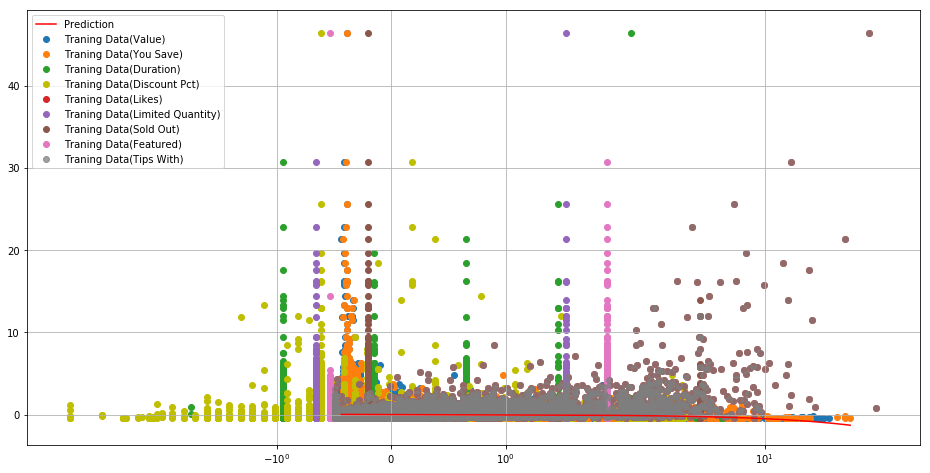

In [181]:
x = np.linspace(data3.you_save.min(), data3.you_save.max(), 100)
f = g3[0, 0] + (g3[0, 1] * x)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, f, 'r', label='Prediction')

#ax.set_yscale('symlog')
ax.set_xscale('symlog')

ax.scatter(data3.value, data3.num_sold, label='Traning Data(Value)')
ax.scatter(data3.you_save, data3.num_sold, label='Traning Data(You Save)')
ax.scatter(data3.duration, data3.num_sold, label='Traning Data(Duration)')
ax.scatter(data3.discount_pct, data3.num_sold, label='Traning Data(Discount Pct)',c='y')
ax.scatter(data3.likes, data3.num_sold, label='Traning Data(Likes)')
ax.scatter(data3.limited_quantity, data3.num_sold, label='Traning Data(Limited Quantity)')
ax.scatter(data3.sold_out, data3.num_sold, label='Traning Data(Sold Out)')
ax.scatter(data3.featured, data3.num_sold, label='Traning Data(Featured)')
ax.scatter(data3.likes, data3.num_sold, label='Traning Data(Tips With)',alpha=0.75)

ax.legend(loc='best')
#ax.set_title('Predicted Price vs. Size and Number of bedrooms')

ax.grid(True)

In [177]:
compute_cost(X3, y3, g3)

0.26786333104651094

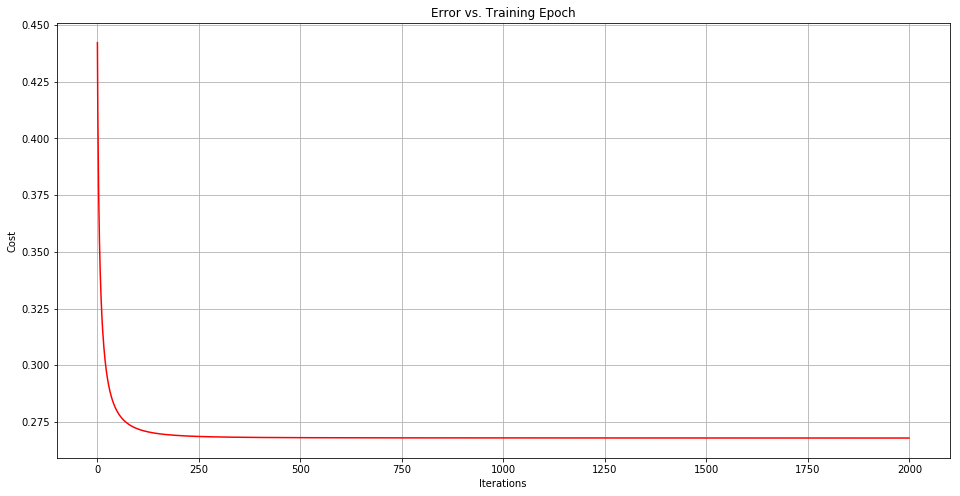

In [178]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(np.arange(iters3), cost3, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
ax.grid(True)

## PART 4 DATA NOT NORMALIZED

In [8]:
data3.insert(0, 'beta zero', 1)

In [35]:
data3.drop(['limited_quantity','sold_out','featured'],axis=1,inplace=True)

In [48]:
data3.head()

beta zero  value  you_save  discount_pct  duration  likes  tips_with  \
0          1     30        15            50         1   14.0         25   
1          1     70        35            50         1   20.0         10   
2          1     99        54            55         2   28.0         20   
3          1     65        35            54         1   27.0         20   
4          1    134        67            50         2   36.0          5   

   num_sold  
0       108  
1       255  
2       352  
3       501  
4       359

In [49]:
cols3 = data3.shape[1]
X3 = data3.iloc[:,0:cols3-1]
y3 = data3.iloc[:,cols3-1:cols3+1]

In [50]:
X3 = np.matrix(X3.values)
y3 = np.matrix(y3.values)

In [51]:
beta3 = np.matrix(np.zeros(cols3-1,dtype=np.int))

X3.shape, y3.shape, beta3.shape

((15875, 7), (15875, 1), (1, 7))

In [52]:
beta3

matrix([[0, 0, 0, 0, 0, 0, 0]])

In [53]:
import math

def gradient_descent57(X, y, theta, alpha, iters):

    cost = np.zeros(iters)
    e = compute_cost(X, y, theta)
    m = len(X)
    
    for j in range(iters):
        predicted_values = np.dot(X, theta.transpose())
        print (predicted_values)
        theta = theta - ( (alpha /(m*(j+1)) ) * np.dot((predicted_values - y).transpose(), X) )
        
        print (theta)
        cost[j] = compute_cost(X, y, theta)
        
        '''
        if e-cost[j-1] <= alpha:
            print('Iteration: ',j)
            return theta, cost
'''
    return theta, cost


In [54]:
alpha3 = 0.1
iters3 = 2000

In [55]:
g3, cost3 = gradient_descent57(X3, y3, beta3, alpha3, iters3)
g3

[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
[[    69.14663307   4997.42176378   3282.90696693   3813.12531024
     143.44970709  16044.92983937   5129.25708346]]
[[  742895.56410709]
 [ 1027781.2967811 ]
 [ 1433942.84611024]
 ..., 
 [  581784.41692598]
 [ 2038652.27168504]
 [  727137.53368189]]
[[  -110882.5403598  -41709912.93326047 -26511076.87705983
   -6559393.05716533   -267044.17950427 -16957180.15463603
   -5280263.68756709]]
[[ -2.34671824e+09]
 [ -4.56787542e+09]
 [ -6.50269744e+09]
 ..., 
 [ -2.65757522e+09]
 [ -1.29199939e+10]
 [ -2.33029514e+09]]
[[  3.01257298e+08   1.95655510e+11   1.24550396e+11   1.88063607e+10
    8.12038062e+08   2.23736786e+10   9.72866578e+09]]
[[  9.23580072e+12]
 [  1.95413411e+13]
 [  2.79529284e+13]
 ..., 
 [  1.14733348e+13]
 [  5.87260281e+13]
 [  9.21505112e+12]]
[[ -9.48864802e+11  -6.76256398e+14  -4.30610092e+14  -5.99546060e+13
   -2.62040662e+12  -5.26943999e+13  -2.73653976e+13]]
[[ -3.11699994e+16]
 [ -6.67381426e+16]
 [ -9.55287

[[ -2.33601220e+134  -1.68864338e+137  -1.07529857e+137  -1.47888043e+136
   -6.47602181e+134  -1.22641832e+136  -6.60758740e+135]]
[[ -7.75608765e+138]
 [ -1.66357296e+139]
 [ -2.38146436e+139]
 ..., 
 [ -9.78269362e+138]
 [ -5.04566676e+139]
 [ -7.74511867e+138]]
[[  6.55321671e+136   4.73715249e+139   3.01653585e+139   4.14870435e+138
    1.81671887e+137   3.44047220e+138   1.85362697e+138]]
[[  2.17581583e+141]
 [  4.66682242e+141]
 [  6.68072370e+141]
 ..., 
 [  2.74433975e+141]
 [  1.41546126e+142]
 [  2.17273870e+141]]
[[ -1.80147581e+139  -1.30224071e+142  -8.29244110e+141  -1.14047663e+141
   -4.99415056e+139  -9.45783989e+140  -5.09561074e+140]]
[[ -5.98130621e+143]
 [ -1.28290702e+144]
 [ -1.83652741e+144]
 ..., 
 [ -7.54417546e+143]
 [ -3.89109552e+144]
 [ -5.97284720e+143]]
[[  4.85479134e+141   3.50940430e+144   2.23472728e+144   3.07346680e+143
    1.34587202e+142   2.54879022e+143   1.37321450e+143]]
[[  1.61190028e+146]
 [  3.45730198e+146]
 [  4.94925180e+146]
 ..., 


/home/lucas/Google_Drive/Data_Science/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


[[ -3.68113986e+172  -2.66100170e+175  -1.69447934e+175  -2.33045260e+174
   -1.02050589e+173  -1.93261720e+174  -1.04123829e+174]]
[[ -1.22222150e+177]
 [ -2.62149518e+177]
 [ -3.75276438e+177]
 ..., 
 [ -1.54157857e+177]
 [ -7.95107365e+177]
 [ -1.22049299e+177]]
[[  7.77568506e+174   5.62084354e+177   3.57925486e+177   4.92262348e+176
    2.15561828e+175   4.08227432e+176   2.19941140e+176]]
[[  2.58170291e+179]
 [  5.53739377e+179]
 [  7.92697781e+179]
 ..., 
 [  3.25628200e+179]
 [  1.67950817e+180]
 [  2.57805176e+179]]
[[ -1.61745719e+177  -1.16921837e+180  -7.44537807e+179  -1.02397830e+179
   -4.48400400e+177  -8.49173276e+178  -4.57510015e+178]]
[[ -5.37032287e+181]
 [ -1.15185959e+182]
 [ -1.64892831e+182]
 ..., 
 [ -6.77354688e+181]
 [ -3.49362473e+182]
 [ -5.36272794e+181]]
[[  3.31409097e+179   2.39567147e+182   1.52552169e+182   2.09808164e+181
    9.18750573e+179   1.73991467e+181   9.37415729e+180]]
[[  1.10035299e+184]
 [  2.36010417e+184]
 [  3.37857377e+184]
 ..., 


[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ 

[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ 

[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ 

[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ 

[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ 

[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ 

[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ 

[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ 

[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ 

[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ 

[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ 

[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ 

[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ 

[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ 

[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ 

 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[

[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]
[[ nan  nan  nan  nan  nan  nan  nan]]
[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ 

matrix([[ nan,  nan,  nan,  nan,  nan,  nan,  nan]])

In [44]:
data3.head()#['like'].isnull().sum()

beta zero  value  you_save  discount_pct  duration  likes  tips_with  \
0          1     30        15            50         1   14.0         25   
1          1     70        35            50         1   20.0         10   
2          1     99        54            55         2   28.0         20   
3          1     65        35            54         1   27.0         20   
4          1    134        67            50         2   36.0          5   

   num_sold  
0       108  
1       255  
2       352  
3       501  
4       359

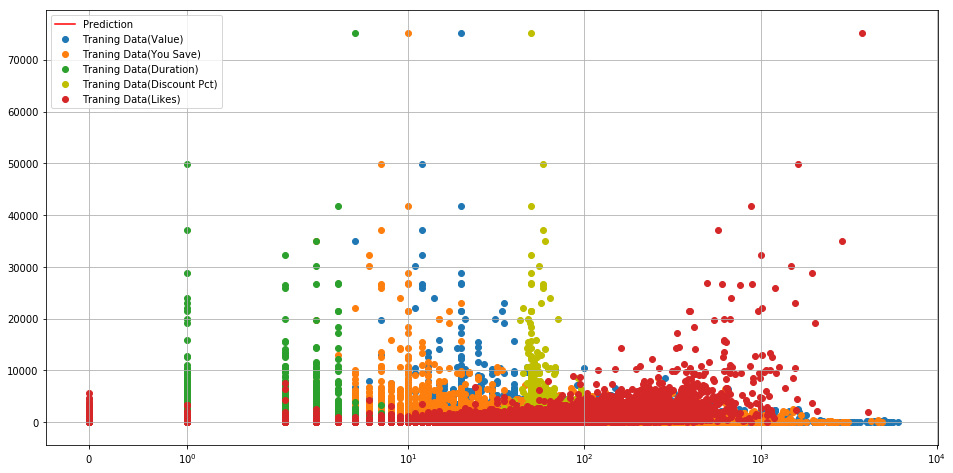

In [46]:
x = np.linspace(data3.you_save.min(), data3.you_save.max(), 100)
f = g3[0, 0] + (g3[0, 1] * x)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, f, 'r', label='Prediction')

#ax.set_yscale('symlog')
ax.set_xscale('symlog')

ax.scatter(data3.value, data3.num_sold, label='Traning Data(Value)')
ax.scatter(data3.you_save, data3.num_sold, label='Traning Data(You Save)')
ax.scatter(data3.duration, data3.num_sold, label='Traning Data(Duration)')
ax.scatter(data3.discount_pct, data3.num_sold, label='Traning Data(Discount Pct)',c='y')
ax.scatter(data3.likes, data3.num_sold, label='Traning Data(Likes)')
'''
ax.scatter(data3.limited_quantity, data3.num_sold, label='Traning Data(Limited Quantity)')
ax.scatter(data3.sold_out, data3.num_sold, label='Traning Data(Sold Out)')
ax.scatter(data3.featured, data3.num_sold, label='Traning Data(Featured)')
ax.scatter(data3.likes, data3.num_sold, label='Traning Data(Tips With)',alpha=0.75)

'''
ax.legend(loc='best')
#ax.set_title('Predicted Price vs. Size and Number of bedrooms')

ax.grid(True)

In [47]:
compute_cost(X3, y3, g3)

nan

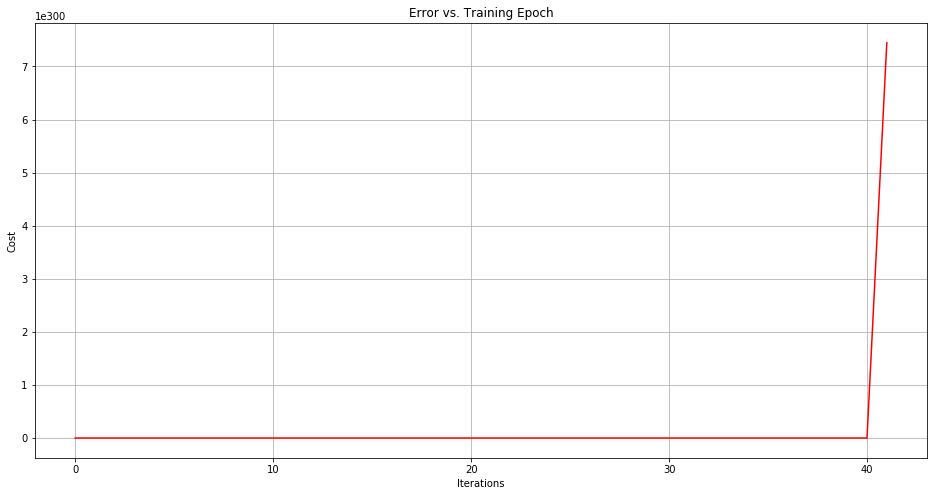

In [26]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(np.arange(iters3), cost3, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
ax.grid(True)